In [1]:
import re

def extract_string_between_quotes(string):
    pattern = r'"([^"]*)"'
    match = re.search(pattern, string)
    if match:
        return match.group(1)
    else:
        return None

def extract_key(string):
    li = string.strip().split()
    if len(li)>1:
        x=li[1].replace("(","")
        x=x.replace(")","")
        return x
    return string.strip().split()[0]
    
def extract_largest_number(string):
    numbers = re.findall(r'-?\d+(?:\.\d+)?', string)
    if numbers:
        largest_number = max(map(float, numbers))
        return largest_number
    else:
        return None
    
class Pin:
    def __init__(self,pg,rv,fv,pin=" "):
        self.pin=pin
        self.pg=pg
        self.rv=rv
        self.fv=fv
cell = {}

def process_file(filename):
    powerdict = {}
    with open(filename, "r") as f:
        with open("cellmap.txt", "w") as w:
            line = f.readline()
            while line:
                if line.find("cell (") >= 0 or line.find("internal_power") >= 0 or line.find(
                        "related_pin") >= 0 or line.find("related_pg_pin") >= 0:
                    w.writelines(line)
                else:
                    if line.find("rise_power (") >= 0:
                        maxnum = -1000
                        while line.find("}") < 0:
                            if line.find("\\") >= 0 and line.find("values") < 0:
                                maxnum = extract_largest_number(line)
                            line = f.readline()
                        w.writelines("max risevalue: " + str(maxnum) + "\n")
                    elif line.find("fall_power (") >= 0:
                        while line.find("}") < 0:
                            if line.find("\\") >= 0 and line.find("values") < 0:
                                maxnum = extract_largest_number(line)
                            line = f.readline()
                        w.writelines("max fallvalue: " + str(maxnum) + "\n}\n")
                line = f.readline()
        w.close()
    li = []
    with open("cellmap.txt", "r") as f:
        with open("cellmap2.txt", "w") as w:
            line = " "
            while line:
                line = f.readline()
                if line.find("cell (") >= 0:
                    li.append(extract_key(line))
                    w.writelines(line)
                    while line.find("internal_power") < 0:
                        line = f.readline()
                w.writelines(line)
        w.close()
    with open("cellmap2.txt", "r") as f:
        line = "xx"
        key = ""
        while line:
            if line.find("cell (") >= 0:
                key = extract_key(line)
                powerlist = []
                line = f.readline()
                while line.find("cell (") < 0 and line:
                    if line.find("internal_power") >= 0:
                        pin = " "
                        rv = 0
                        fv = 0
                        pg = ""
                        while line.find("}") < 0 and line:
                            line = f.readline()
                            if line.find("related_pin") >= 0:
                                pin = extract_string_between_quotes(line)
                            if line.find("VDD") >= 0:
                                pg = "VDD"
                            if line.find("VSS") >= 0:
                                pg = "VSS"
                            if line.find("risevalue") >= 0:
                                rv = float(line.strip().split()[-1])
                            if line.find("fallvalue") >= 0:
                                fv = float(line.strip().split()[-1])
                        powerlist.append(Pin(pg, rv, fv, pin))
                    line = f.readline()
                powerdict[key] = powerlist
            else:
                line = f.readline()
    return powerdict
 

In [2]:
#asap7sc7p5t_AO_LVT_TT_nldm_211120.lib
#asap7sc7p5t_OA_LVT_TT_nldm_211120 (1).lib
#asap7sc7p5t_SIMPLE_LVT_TT_nldm_211120.lib
#asap7sc7p5t_SEQ_LVT_TT_nldm_220123.lib
#asap7sc7p5t_INVBUF_SLVT_TT_nldm_220122.lib
filelist = ["asap7sc7p5t_AO_LVT_TT_nldm_211120.lib","asap7sc7p5t_OA_LVT_TT_nldm_211120 (1).lib","asap7sc7p5t_SIMPLE_LVT_TT_nldm_211120.lib","asap7sc7p5t_SEQ_LVT_TT_nldm_220123.lib","asap7sc7p5t_INVBUF_SLVT_TT_nldm_220122.lib"]
powerdict={}
for filename in filelist:
    powerdict.update(process_file(filename))
print(len(powerdict))

200


In [3]:
ogdict={}
for x in powerdict:
    maxnum=-1000
    for y in powerdict[x]:
        if y.pg == "VDD":
            maxnum=max(y.rv,y.fv,maxnum)
    ogdict[x]=maxnum
print(ogdict)

{'A2O1A1Ixp33_ASAP7_75t_L': 0.581277, 'A2O1A1O1Ixp25_ASAP7_75t_L': 0.592485, 'AO211x2_ASAP7_75t_L': 8.36883, 'AO21x1_ASAP7_75t_L': 9.22268, 'AO21x2_ASAP7_75t_L': 9.99859, 'AO221x1_ASAP7_75t_L': 9.85999, 'AO221x2_ASAP7_75t_L': 4.08372, 'AO222x2_ASAP7_75t_L': 9.65929, 'AO22x1_ASAP7_75t_L': 7.2047, 'AO22x2_ASAP7_75t_L': 9.87526, 'AO31x2_ASAP7_75t_L': 1.38882, 'AO322x2_ASAP7_75t_L': 7.08272, 'AO32x1_ASAP7_75t_L': 8.66357, 'AO32x2_ASAP7_75t_L': 0.860348, 'AO331x1_ASAP7_75t_L': 7.84338, 'AO331x2_ASAP7_75t_L': 9.9008, 'AO332x1_ASAP7_75t_L': 9.00021, 'AO332x2_ASAP7_75t_L': 9.64647, 'AO333x1_ASAP7_75t_L': 9.63114, 'AO333x2_ASAP7_75t_L': 9.85823, 'AO33x2_ASAP7_75t_L': 9.0006, 'AOI211x1_ASAP7_75t_L': 9.19637, 'AOI211xp5_ASAP7_75t_L': 9.96591, 'AOI21x1_ASAP7_75t_L': 1.08141, 'AOI21xp33_ASAP7_75t_L': 0.357738, 'AOI21xp5_ASAP7_75t_L': 0.531479, 'AOI221x1_ASAP7_75t_L': 0.852338, 'AOI221xp5_ASAP7_75t_L': 9.84841, 'AOI222xp33_ASAP7_75t_L': 8.90051, 'AOI22x1_ASAP7_75t_L': 1.16354, 'AOI22xp33_ASAP7_75t_L

In [4]:
import random as rnd
import numpy as np
from matplotlib import pyplot as plt

def f(x, p,li):
    c = rnd.uniform(0, 1)
    r2 = rnd.uniform(c, 1)
    r1 = rnd.uniform(0, c)

    while (r2 - c) < (c - r1):
        c = rnd.uniform(0, 1)
        r2 = rnd.uniform(c, 1)
        r1 = rnd.uniform(0, c)  
    m1=p/(c-r1)
    m2=p/(c-r2)
    li.append(r2-c)
    li.append(c-r1)


distancedict={}
x=np.linspace(0,1,10000)
for y in ogdict:
    distli=[]
    f(x, ogdict[y],distli)
    distancedict[y]=distli

    

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
print(distancedict)

{'A2O1A1Ixp33_ASAP7_75t_L': [0.5340475396936468, 0.01564852203711664], 'A2O1A1O1Ixp25_ASAP7_75t_L': [0.40049943356482864, 0.003745891808834778], 'AO211x2_ASAP7_75t_L': [0.1390550968408677, 0.10989703028036035], 'AO21x1_ASAP7_75t_L': [0.7474333482592016, 0.12406462584344945], 'AO21x2_ASAP7_75t_L': [0.5679415844599026, 0.0014763342575916938], 'AO221x1_ASAP7_75t_L': [0.2933178779211941, 0.2804176900182068], 'AO221x2_ASAP7_75t_L': [0.6064164453966041, 0.0020665853312308857], 'AO222x2_ASAP7_75t_L': [0.33560511528033765, 0.06601008912797801], 'AO22x1_ASAP7_75t_L': [0.6500750530704172, 0.0783166438404621], 'AO22x2_ASAP7_75t_L': [0.8529634520489116, 0.008144830383887492], 'AO31x2_ASAP7_75t_L': [0.5546880647222802, 0.16574901349752766], 'AO322x2_ASAP7_75t_L': [0.4461202682759814, 0.08091268834254911], 'AO32x1_ASAP7_75t_L': [0.7229601895654791, 0.219284961075823], 'AO32x2_ASAP7_75t_L': [0.5065447369277383, 0.22719569000381357], 'AO331x1_ASAP7_75t_L': [0.258134730050406, 0.05808707082090747], 'AO

In [6]:
import pickle
from delayobject import DelayObject

# Load the objectdict dictionary from parsingfile.ipynb
with open('objectdict.pickle', 'rb') as f:
    objectdict = pickle.load(f)

In [7]:
print(objectdict["!"])

In [8]:
print(len(objectdict))

39137


In [11]:
class OutputPair:
    def __init__(self,cellname,output):
        self.cellname=cellname
        self.output=output


with open('outputlist.pickle', 'rb') as f:
    outputlist=pickle.load(f)


In [12]:
print(len(outputlist))

26198


In [13]:
namelist=[]
for y in list(objectdict.keys()):
    namelist.append(objectdict[y].name)
    
print(namelist)

['fbus_ICCADs_fixedClockNode_auto_out_clock', 'reset', 'mmio_axi4_0_aw_ready', 'mmio_axi4_0_w_ready', 'mmio_axi4_0_b_valid', 'mmio_axi4_0_b_bits_id', 'mmio_axi4_0_b_bits_resp', 'mmio_axi4_0_ar_ready', 'mmio_axi4_0_r_valid', 'mmio_axi4_0_r_bits_id', 'mmio_axi4_0_r_bits_data', 'mmio_axi4_0_r_bits_resp', 'mmio_axi4_0_r_bits_last', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_valid', 'l2_frontend_bus_axi4_0_aw_bits_id', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_addr', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_len', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_size', 'fbus_ICCADs_coupler_from_port_named_slave_port_axi4_ICCADs_axi4index_auto_out_aw_bits_burst', 'l2_frontend_bus_axi4_0_aw_bits_lock', 'l2_frontend_bus_axi4_0_aw_bits_cache', 'l2_frontend_bus_axi4_0_aw_bits_prot', 'l2_frontend_bus_axi4_0_aw_bits_qos', 'fbus_ICCAD

In [14]:
for x in outputlist:
    if x.output == objectdict["ZK$"].name:
        print(ogdict[x.cellname])
newdict= {float(key) * 1e-8: value for key, value in objectdict["ZK$"].toggle.items()}
print(newdict)

0.497611
{0.9: '0', 0.90005031: '1', 0.90005172: '0', 0.90015022: '1', 0.90015155: '0', 0.90015239: '1', 0.90015246: '0', 0.90015269: '1', 0.90015271: '0', 0.90015294: '1', 0.90015302: '0', 0.90025298: '1', 0.90035016: '0', 0.90045187: '1', 0.9004519: '0', 0.9004523400000001: '1', 0.90045235: '0', 0.90045254: '1', 0.90045277: '0', 0.90045295: '1', 0.90055026: '0', 0.9005516100000001: '1', 0.9005520300000001: '0', 0.9006516800000001: '1', 0.90075132: '0', 0.9007516600000001: '1', 0.90075174: '0', 0.90085149: '1', 0.9008517300000001: '0', 0.90085232: '1', 0.90085241: '0', 0.90085299: '1', 0.9008532100000001: '0', 0.90085369: '1', 0.90085381: '0', 0.90095155: '1', 0.90095167: '0', 0.90105159: '1', 0.90105168: '0', 0.90105247: '1', 0.90105285: '0', 0.90125151: '1', 0.90125161: '0', 0.90125168: '1', 0.90125186: '0', 0.90125214: '1', 0.90125223: '0', 0.9012522900000001: '1', 0.90125232: '0', 0.9012526200000001: '1', 0.90125269: '0', 0.90135211: '1', 0.90135214: '0', 0.90135257: '1', 0.901352

In [15]:
import matplotlib.pyplot as plt
import numpy as np

y = []
peak = ogdict["XNOR2xp5_ASAP7_75t_L"]
t1 = distancedict["XNOR2xp5_ASAP7_75t_L"][1]
t2 = distancedict["XNOR2xp5_ASAP7_75t_L"][0]

def g(value, peak, t1, t2, t):
    c = value + t1
    r2 = c + t2
    r1 = value
    m1 = peak / (c - r1)
    m2 = peak / (c - r2)
    
    if t <= c:
        return m1 * (t - r1)
    return m2 * (t - r2)


timepowerdict = {}


newdict_keys = list(newdict.keys())

powerx=[]
for x in newdict_keys:
    powerx.append(x)
    powerx.append(x+t1+t2)

additional_points = np.linspace(1, 2, 1000)
powerx = powerx + additional_points.tolist()  # Convert additional_points to a list before adding
powerx.sort()

for value in newdict_keys:
    if newdict[value] == "1":
        for t in powerx:
            power = g(value, peak, t1, t2, t)
            if power >= 0:
                if t not in timepowerdict:
                    timepowerdict[t] = []
                timepowerdict[t].append(power)

print(timepowerdict[0.90005031])

[0.0]


In [16]:
print(len(set(timepowerdict.keys())))

6695


In [17]:
for x in list(timepowerdict.keys()):
    timepowerdict[x] = sum(timepowerdict[x])
    
print(timepowerdict.values())
print(timepowerdict.keys())

dict_values([0.0, 2.319185683730551e-06, 0.00016433322103889824, 0.00016870842239982958, 0.00017147170746985304, 0.00017181711810369726, 0.0001729520387571308, 0.00017308362376039572, 0.0001745968512990375, 0.00017525477631536197, 0.0009973320846455127, 0.001956389381446721, 0.0029601526831307306, 0.002960498093763662, 0.0029655641163931945, 0.0029656957013957292, 0.0029681958164584927, 0.002971600578420437, 0.002974265174738194, 0.004574832259044176, 0.004597037228356995, 0.0046046362622995584, 0.006407597529858711, 0.008374266989689974, 0.008380977824860867, 0.008382688429903312, 0.010515599093321728, 0.010521125663463964, 0.010534711815057456, 0.010536932311988916, 0.010551242181099457, 0.010557031921248957, 0.010569664081568229, 0.010573019499151485, 0.01330600712215274, 0.013309559917240893, 0.016267853962200044, 0.016270666591646575, 0.016295355227896286, 0.016307855803213755, 0.02284302499380461, 0.02284647910014031, 0.02284889697457722, 0.02285541043224285, 0.022865542477498262

In [18]:
x = list(timepowerdict.keys())
y = list(timepowerdict.values())
print(x)
print(len(y))

[0.90005031, 0.90005172, 0.90015022, 0.90015155, 0.90015239, 0.90015246, 0.90015269, 0.90015271, 0.90015294, 0.90015302, 0.90025298, 0.90035016, 0.90045187, 0.9004519, 0.9004523400000001, 0.90045235, 0.90045254, 0.90045277, 0.90045295, 0.90055026, 0.9005516100000001, 0.9005520300000001, 0.9006516800000001, 0.90075132, 0.9007516600000001, 0.90075174, 0.90085149, 0.9008517300000001, 0.90085232, 0.90085241, 0.90085299, 0.9008532100000001, 0.90085369, 0.90085381, 0.90095155, 0.90095167, 0.90105159, 0.90105168, 0.90105247, 0.90105285, 0.90125151, 0.90125161, 0.90125168, 0.90125186, 0.90125214, 0.90125223, 0.9012522900000001, 0.90125232, 0.9012526200000001, 0.90125269, 0.90135211, 0.90135214, 0.90135257, 0.9013525800000001, 0.90135274, 0.9013529, 0.90135304, 0.9014502600000001, 0.90145268, 0.9014527, 0.90145295, 0.90155016, 0.90175022, 0.9017514, 0.90175183, 0.90175189, 0.90185193, 0.90185249, 0.90185272, 0.9018527900000001, 0.90195031, 0.9019515300000001, 0.9020504300000001, 0.90205166, 0.9

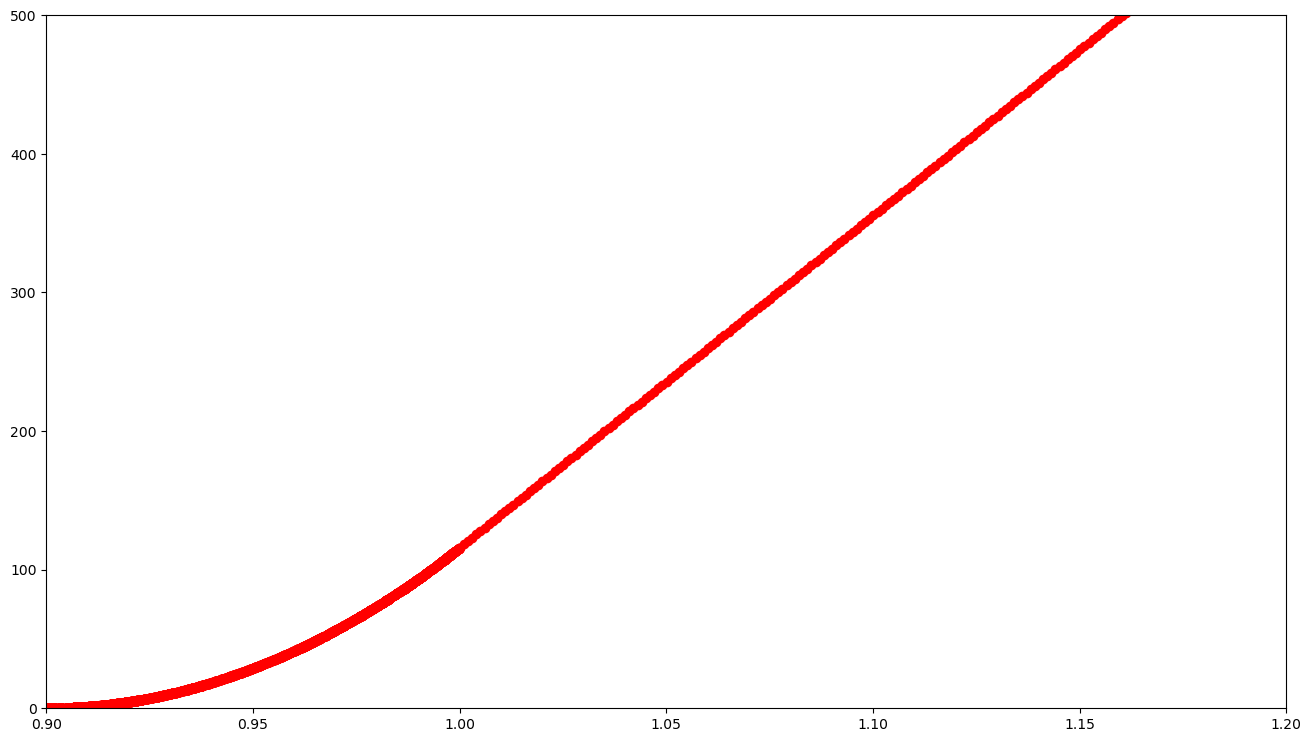

In [19]:
plt.figure(figsize=(16, 9))
plt.scatter(x,y,color='red')
plt.ylim(0,500)
plt.xlim(0.9,1.2)
plt.show()

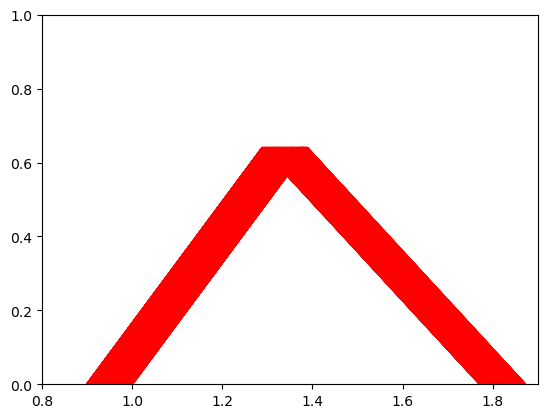

In [20]:


x_values = [float(z) * 1e-8 for z in objectdict["ZK$"].toggle.keys()]

fig, ax = plt.subplots()

for value in objectdict["ZK$"].toggle:
    if objectdict["ZK$"].toggle[value] == "1":
        x = float(value) * 0.00000001
        ax.plot([x, distancedict["XNOR2xp5_ASAP7_75t_L"][1] + x, distancedict["XNOR2xp5_ASAP7_75t_L"][1] + distancedict["XNOR2xp5_ASAP7_75t_L"][0] + x], [0, ogdict["XNOR2xp5_ASAP7_75t_L"], 0], color='red')


plt.ylim(0,1)
plt.xlim(0.8,1.9)
plt.show()


In [21]:
print(outputlist)

[<__main__.OutputPair object at 0x7fa6209f0ca0>, <__main__.OutputPair object at 0x7fa620a14af0>, <__main__.OutputPair object at 0x7fa620a01f10>, <__main__.OutputPair object at 0x7fa620a305b0>, <__main__.OutputPair object at 0x7fa620a30d00>, <__main__.OutputPair object at 0x7fa60140fe20>, <__main__.OutputPair object at 0x7fa60140ff40>, <__main__.OutputPair object at 0x7fa60140feb0>, <__main__.OutputPair object at 0x7fa60140fb20>, <__main__.OutputPair object at 0x7fa60140fbb0>, <__main__.OutputPair object at 0x7fa561623ca0>, <__main__.OutputPair object at 0x7fa5616238e0>, <__main__.OutputPair object at 0x7fa5616239a0>, <__main__.OutputPair object at 0x7fa61088b040>, <__main__.OutputPair object at 0x7fa61088b0d0>, <__main__.OutputPair object at 0x7fa61088b160>, <__main__.OutputPair object at 0x7fa61088b1c0>, <__main__.OutputPair object at 0x7fa61088b220>, <__main__.OutputPair object at 0x7fa61088b280>, <__main__.OutputPair object at 0x7fa61088b2e0>, <__main__.OutputPair object at 0x7fa610

In [22]:
print(len(objectdict))

39137


In [23]:
radixtocell={}
for x in objectdict:
    for y in outputlist:
        if objectdict[x].name == y.output:
            radixtocell[x]=y.cellname


In [27]:
print(len(radixtocell))##not all wires are output wires

7419


In [28]:
for x in radixtocell:
    print(x)
    print(radixtocell[x])

-c
AO22x2_ASAP7_75t_L
9#!
BUFx8_ASAP7_75t_SL
F7!
BUFx8_ASAP7_75t_SL
b7!
BUFx8_ASAP7_75t_SL
(8!
BUFx8_ASAP7_75t_SL
P9!
BUFx8_ASAP7_75t_SL
Q9!
BUFx8_ASAP7_75t_SL
R9!
BUFx8_ASAP7_75t_SL
X9!
BUFx8_ASAP7_75t_SL
Y9!
BUFx8_ASAP7_75t_SL
[9!
BUFx8_ASAP7_75t_SL
\9!
BUFx8_ASAP7_75t_SL
^9!
BUFx8_ASAP7_75t_SL
_9!
BUFx8_ASAP7_75t_SL
b9!
BUFx8_ASAP7_75t_SL
d9!
BUFx8_ASAP7_75t_SL
e9!
BUFx8_ASAP7_75t_SL
g9!
BUFx8_ASAP7_75t_SL
h9!
BUFx8_ASAP7_75t_SL
j9!
BUFx8_ASAP7_75t_SL
p9!
BUFx8_ASAP7_75t_SL
r9!
BUFx8_ASAP7_75t_SL
s9!
BUFx8_ASAP7_75t_SL
u9!
BUFx8_ASAP7_75t_SL
v9!
BUFx8_ASAP7_75t_SL
x9!
BUFx8_ASAP7_75t_SL
,:!
BUFx8_ASAP7_75t_SL
0:!
BUFx8_ASAP7_75t_SL
u;!
BUFx8_ASAP7_75t_SL
{;!
BUFx8_ASAP7_75t_SL
|;!
BUFx8_ASAP7_75t_SL
};!
BUFx8_ASAP7_75t_SL
~;!
BUFx8_ASAP7_75t_SL
"<!
BUFx8_ASAP7_75t_SL
#<!
BUFx8_ASAP7_75t_SL
;=!
BUFx8_ASAP7_75t_SL
<=!
BUFx8_ASAP7_75t_SL
==!
BUFx8_ASAP7_75t_SL
s@!
NAND2xp67_ASAP7_75t_L
t@!
INVxp67_ASAP7_75t_SL
u@!
NAND2xp67_ASAP7_75t_L
v@!
AO22x2_ASAP7_75t_L
w@!
NAND2xp67_ASAP7_75t_L
x

In [29]:
celltoobj={}
for x in distancedict:
    celltoobj[x]=[]
for x in celltoobj:
    for y in objectdict:
        if y in radixtocell and radixtocell[y] == x:
            celltoobj[x].append(objectdict[y])

In [30]:
print(celltoobj)

{'A2O1A1Ixp33_ASAP7_75t_L': [], 'A2O1A1O1Ixp25_ASAP7_75t_L': [], 'AO211x2_ASAP7_75t_L': [<delayobject.DelayObject object at 0x7fa5a7c761c0>, <delayobject.DelayObject object at 0x7fa5a7c76340>, <delayobject.DelayObject object at 0x7fa5a7c76400>, <delayobject.DelayObject object at 0x7fa5a7c764c0>, <delayobject.DelayObject object at 0x7fa5a7c76580>, <delayobject.DelayObject object at 0x7fa5aa26d880>, <delayobject.DelayObject object at 0x7fa616d6c100>, <delayobject.DelayObject object at 0x7fa616e87c40>, <delayobject.DelayObject object at 0x7fa616eb4520>, <delayobject.DelayObject object at 0x7fa5adc29760>, <delayobject.DelayObject object at 0x7fa5adc2f9a0>, <delayobject.DelayObject object at 0x7fa5adc36220>, <delayobject.DelayObject object at 0x7fa5adc36b20>, <delayobject.DelayObject object at 0x7fa5ae024c40>, <delayobject.DelayObject object at 0x7fa5ae044c40>, <delayobject.DelayObject object at 0x7fa5ae04b4c0>, <delayobject.DelayObject object at 0x7fa59479b760>, <delayobject.DelayObject ob

In [31]:
print(celltoobj["AOI31xp67_ASAP7_75t_L"][0].toggle)

{'90000000': '1', '90005107': '0', '90025048': '1', '90045048': '0', '90045103': '1', '90075104': '0', '90085107': '1', '90095048': '0', '90115103': '1', '90135048': '0', '90145048': '1', '90165045': '0', '90175048': '1', '90185104': '0', '90195046': '1', '90205107': '0', '90215103': '1', '90215104': '0', '90225046': '1', '90235104': '0', '90265103': '1', '90265104': '0', '90275107': '1', '90285045': '0', '90285103': '1', '90295107': '0', '90315103': '1', '90345048': '0', '90355103': '1', '90365045': '0', '90365107': '1', '90375048': '0', '90395048': '1', '90395104': '0', '90415107': '1', '90425048': '0', '90455046': '1', '90465048': '0', '90465103': '1', '90465104': '0', '90505048': '1', '90515048': '0', '90525103': '1', '90525104': '0', '90535046': '1', '90545048': '0', '90555103': '1', '90565045': '0', '90575048': '1', '90575104': '0', '90595046': '1', '90615045': '0', '90635046': '1', '90645045': '0', '90655107': '1', '90665048': '0', '90665103': '1', '90665104': '0', '90675046': '

In [32]:
print(len(celltoobj))

200


In [33]:
def g(value, peak, t1, t2, t):
    c = value + t1
    r2 = c + t2
    r1 = value
    m1 = peak / (c - r1)
    m2 = peak / (c - r2)
    
    if t <= c:
        return m1 * (t - r1)
    return m2 * (t - r2)

def plotGraph(distancedict1:str,distancedict2:str,ogdict:float,radix):
    y = []
    peak = ogdict#["AO221x2_ASAP7_75t_L"] peak value
    t1 = distancedict2#["AO221x2_ASAP7_75t_L"][1] 
    t2 = distancedict1#["AO221x2_ASAP7_75t_L"][0]

    timepowerdict = {}
    newdict= {float(key) * 1e-8: value for key, value in objectdict[radix].toggle.items()}
    newdict_keys = list(newdict.keys())
    powerx=[]
    for x in newdict_keys:
        powerx.append(x)
        powerx.append(x+t1+t2)
    additional_points = np.linspace(1, 2, 1000)
    powerx = powerx + additional_points.tolist()  # Convert additional_points to a list before adding
    powerx.sort()
    
    for value in newdict_keys:
        if newdict[value] == "1":
            for t in powerx:
                power = g(value, peak, t1, t2, t)
                if power >= 0:
                    if t not in timepowerdict:
                        timepowerdict[t] = []
                    timepowerdict[t].append(power)
    for x in list(timepowerdict.keys()):
        timepowerdict[x] = sum(timepowerdict[x])
    return timepowerdict

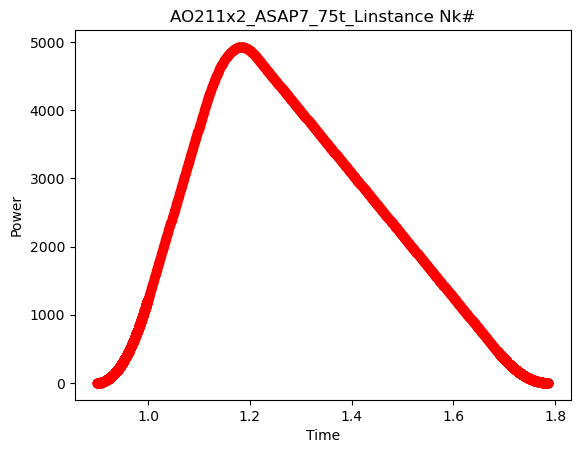

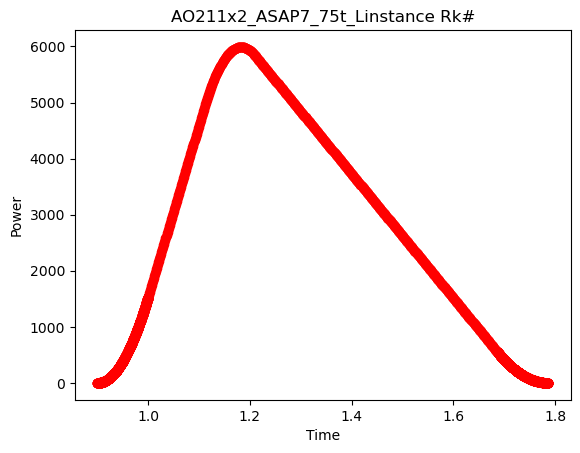

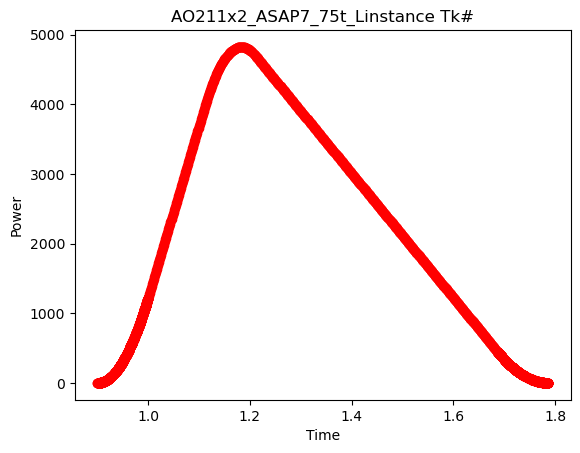

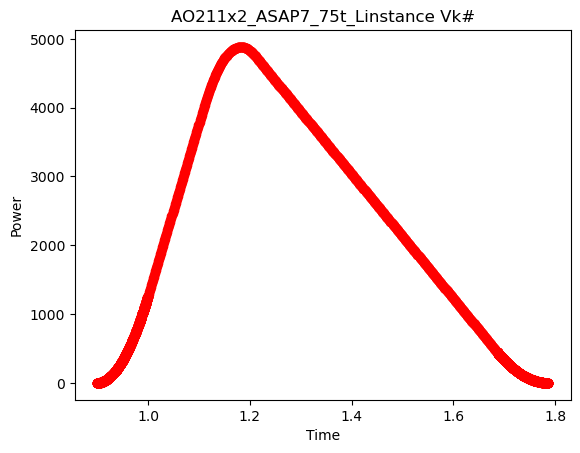

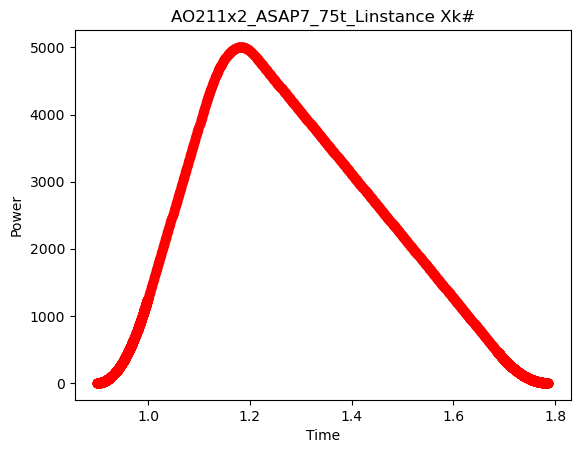

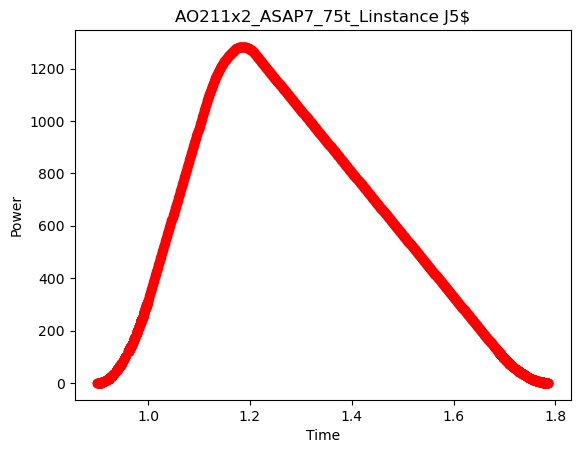

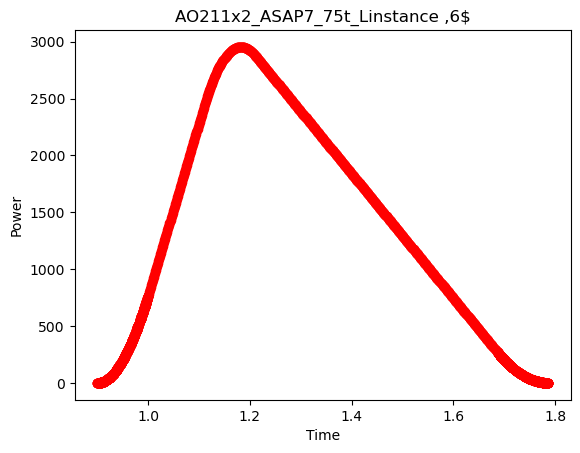

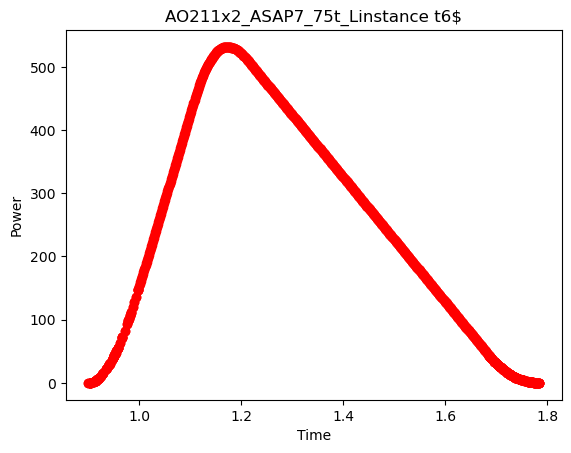

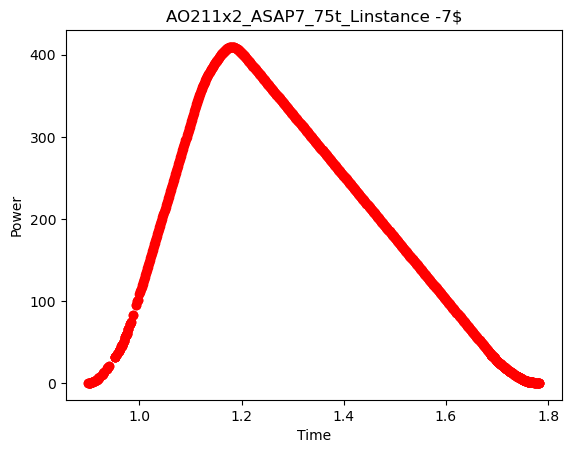

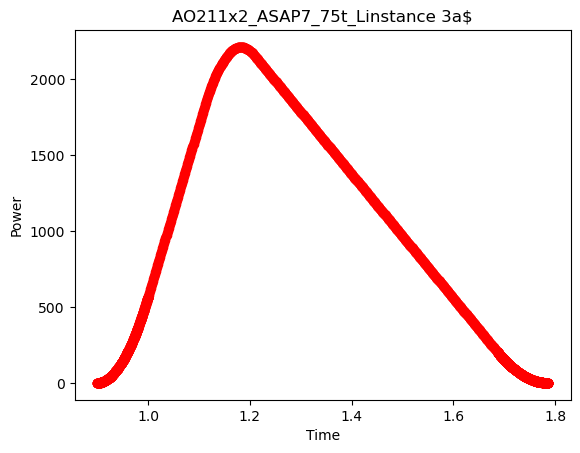

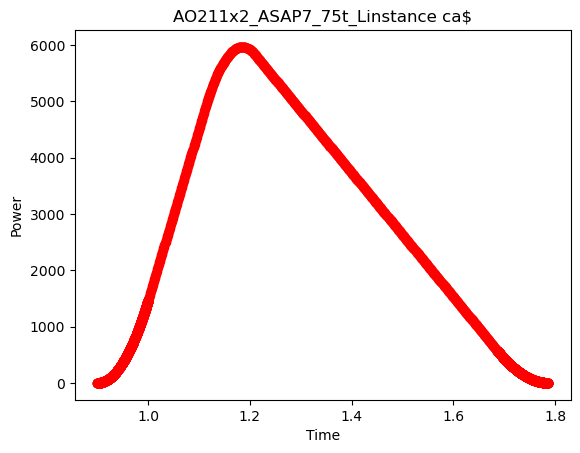

KeyboardInterrupt: 

In [34]:
for x in celltoobj:
    for y in celltoobj[x]:
        dic=plotGraph(distancedict[x][0], distancedict[x][1],ogdict[x],y.radix)
        x_value = list(dic.keys())
        y_value = list(dic.values())
        plt.xlabel("Time")
        plt.ylabel("Power")
        plt.title(x+"instance "+y.radix)
        plt.scatter(x_value, y_value, color = 'red')
        plt.show()

In [35]:
import numpy as np
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

dataset=[]
for x in celltoobj:
    for y in celltoobj[x]:
        dic = plotGraph(distancedict[x][0], distancedict[x][1], ogdict[x], y.radix)
        x_value = list(dic.keys())
        y_value = list(dic.values())
        dataset.append([x_value,y_value])
        #plt.xlabel("Time")
        #plt.ylabel("Power")
        #plt.title(x+" instance "+y.radix)
        #plt.plot(x_value,y_value,color='red')
        #plt.show()


In [37]:
print(dataset[0][1])

[0.0, 4.801389296365533e-06, 0.011981066752753972, 0.011997071383735933, 0.01222673783831954, 0.023999744388312445, 0.047741414102044084, 0.047986284956065446, 0.06402452566261801, 0.06415056213160875, 0.0644266420160276, 0.08755973563669477, 0.0878718259408297, 0.08790543566590428, 0.11593034474605138, 0.1476291168680142, 0.14771234094914526, 0.18369395232172925, 0.18391361588197466, 0.18396162977489391, 0.18422170502836185, 0.18439335469562138, 0.5357030070550679, 0.5358614529017813, 0.5837024958317194, 0.583733704862117, 0.7916950790253321, 0.7917622984754813, 0.8479745636402456, 0.8480825948993804, 0.9082800131785201, 0.9083632372596155, 0.9724265741523768, 0.9724605839932322, 0.9725626135157233, 1.0435247465930855, 1.260401100328759, 1.2605455421234175, 1.260636768519964, 1.3403398308078258, 1.4200028815182995, 1.4205070273942315, 1.420733893038322, 1.5071749049694563, 1.5087681659836572, 1.5990094775413166, 2.0591242129338285, 2.059594749084704, 2.0599980657854378, 2.060148109200

In [38]:
dataset_copy=dataset
for x in dataset_copy:
    for y in x:
        print(len(y))

3297
3297
3844
3844
3250
3250
3281
3281
3337
3337
1442
1442
2298
2298
1056
1056
991
991
1914
1914
3829
3829
4660
4660
3894
3894
2500
2500
1794
1794
2824
2824
1721
1721
827
827
2139
2139
2762
2762
1446
1446
1997
1997
455
455
1569
1569
437
437
2615
2615
366
366
437
437
437
437
437
437
366
366
437
437
0
0
1522
1522
2199
2199
546
546
2017
2017
366
366
0
0
437
437
435
435
437
437
1445
1445
2127
2127
2219
2219
1982
1982
2357
2357
2851
2851
1841
1841
2497
2497
2815
2815
2327
2327
652
652
1179
1179
1861
1861
1497
1497
1696
1696
111
111
1515
1515
1844
1844
1792
1792
111
111
1580
1580
1424
1424
111
111
1899
1899
1365
1365
1819
1819
1661
1661
2304
2304
1836
1836
2452
2452
2341
2341
2399
2399
2427
2427
2444
2444
2416
2416
2452
2452
2412
2412
2429
2429
2443
2443
2473
2473
2492
2492
1084
1084
1657
1657
1659
1659
247
247
247
247
1225
1225
1248
1248
1312
1312
1244
1244
1216
1216
1231
1231
1275
1275
1236
1236
1232
1232
1273
1273
1225
1225
1252
1252
1195
1195
1235
1235
1256
1256
1232
1232
1228
1228
1273

In [39]:
print(len(dataset_copy))
for x in dataset_copy:
    for y in x:
        if len(y) < 100:
            dataset_copy.remove(x)
            break
print(len(dataset_copy))

7419
7074


In [40]:
for x in dataset_copy:
    for y in x:
        print(len(y))

3297
3297
3844
3844
3250
3250
3281
3281
3337
3337
1442
1442
2298
2298
1056
1056
991
991
1914
1914
3829
3829
4660
4660
3894
3894
2500
2500
1794
1794
2824
2824
1721
1721
827
827
2139
2139
2762
2762
1446
1446
1997
1997
455
455
1569
1569
437
437
2615
2615
366
366
437
437
437
437
437
437
366
366
437
437
1522
1522
2199
2199
546
546
2017
2017
366
366
437
437
435
435
437
437
1445
1445
2127
2127
2219
2219
1982
1982
2357
2357
2851
2851
1841
1841
2497
2497
2815
2815
2327
2327
652
652
1179
1179
1861
1861
1497
1497
1696
1696
111
111
1515
1515
1844
1844
1792
1792
111
111
1580
1580
1424
1424
111
111
1899
1899
1365
1365
1819
1819
1661
1661
2304
2304
1836
1836
2452
2452
2341
2341
2399
2399
2427
2427
2444
2444
2416
2416
2452
2452
2412
2412
2429
2429
2443
2443
2473
2473
2492
2492
1084
1084
1657
1657
1659
1659
247
247
247
247
1225
1225
1248
1248
1312
1312
1244
1244
1216
1216
1231
1231
1275
1275
1236
1236
1232
1232
1273
1273
1225
1225
1252
1252
1195
1195
1235
1235
1256
1256
1232
1232
1228
1228
1273
1273
12

In [41]:
print(dataset[1][1])

[0.0, 0.010063311845394324, 0.010067313003137592, 0.01010972527523846, 0.010122528980025807, 0.03397703134218427, 0.04597810388366347, 0.04615415482445617, 0.062235608034662694, 0.08214536897565508, 0.08217737823762344, 0.1058146177342091, 0.10613871151158716, 0.1342588481460863, 0.1617151927106194, 0.19389090283581092, 0.22606981388725036, 0.26227829090401766, 0.2624511409186068, 0.341850115217847, 0.3818536903561109, 0.4698879633013973, 0.47055255560292086, 0.5179422679391518, 0.5180430971143087, 0.5183863964488544, 0.5184696205299721, 0.5746930889364797, 0.5747323002823327, 0.633561322612608, 0.6340294580688369, 0.6341895043786032, 0.634413569212404, 0.7018346776850846, 0.7019094993349215, 0.7024640597984186, 0.7736926699816025, 0.9265729062746199, 1.0018878988631303, 1.0027361443051477, 1.081775014407316, 1.166723594499354, 1.1668328261057919, 1.253793188312247, 1.3421883656861715, 1.434049345899227, 1.434794761587155, 1.529814255724373, 1.5309761919336047, 1.5311362382434468, 1.62

In [53]:

# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from tensorflow.keras.layers import Activation

def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    
    model.add(Dense(n_outputs, activation='relu'))
    return model


# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def generate_real_samples(epoc):
    X1 = np.array(dataset[epoc][0])
    X2 = np.array(dataset[epoc][1])
    # Combine the two arrays into a single array with shape (n, 2)
    X = np.column_stack((X1, X2))
    # Generate class labels
    y = np.ones((X.shape[0], 1))
    return X, y


# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

def generate_fake_samples(generator, latent_dim, n, target_range=(0.9, 1.8)):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y = np.zeros((n, 1))
    print(X[:,0])
    return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim):
    # prepare real samples
    x_real, y_real = generate_real_samples(epoch)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, len(dataset[epoch][0]))
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
   
    pyplot.show()

In [54]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)

1/1 [==============================] - 0s 45ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.07679732 0.        ]
1/1 [==============================] - 0s 26ms/step
[0.         0.09354083]
1/1 [==============================] - 0s 19ms/step
[0.         0.01855783]
1/1 [==============================] - 0s 24ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.         0.20045784]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.08580866 0.        ]
1/1 [===============

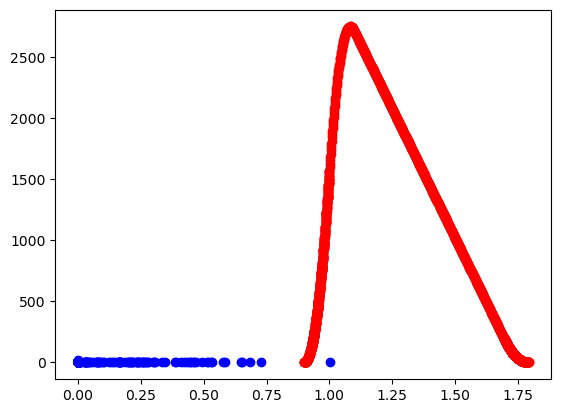

1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.         0.02659023]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 21ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.         0.20306192]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.        1.7278059]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[1

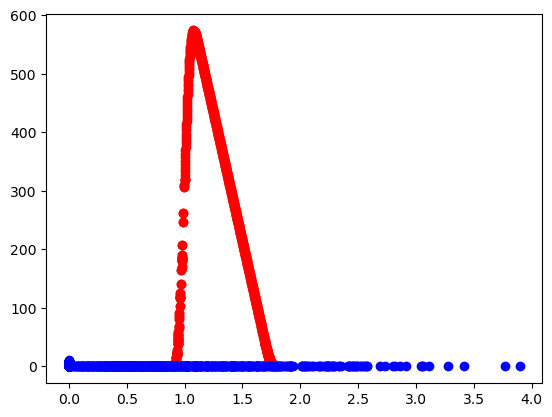

1/1 [==============================] - 0s 19ms/step
[0.7772632 0.       ]
1/1 [==============================] - 0s 18ms/step
[1.2993752 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.66983026 1.928609  ]
1/1 [==============================] - 0s 17ms/step
[0.8730105  0.84509003]
1/1 [==============================] - 0s 21ms/step
[0.193408   0.15958908]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.         0.77166027]
1/1 [==============================] - 0s 19ms/step
[0.        1.1361356]
1/1 [==============================] - 0s 17ms/step
[1.3954211 0.       ]
1/1 [==============================] - 0s 20ms/step
[0.71407723 0.5457425 ]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.7389522 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.        1.19001

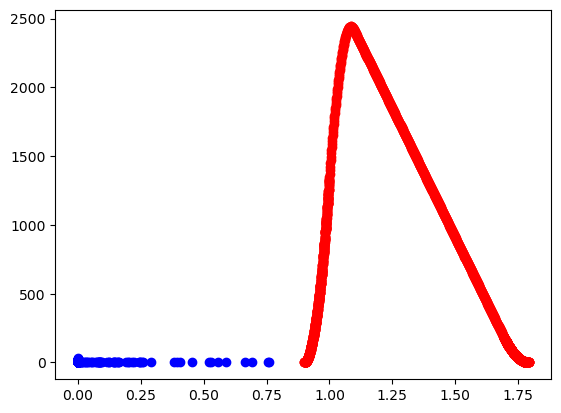

1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.4668274 0.       ]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 21ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.         0.48627642]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [=====

1/1 [==============================] - 0s 17ms/step
[1.4051048 0.       ]
1/1 [==============================] - 0s 17ms/step
[1.3291006 0.       ]
1/1 [==============================] - 0s 17ms/step
[1.7622067 0.8957673]
1/1 [==============================] - 0s 18ms/step
[1.2040255 1.2217231]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[1.1256983 0.       ]
1/1 [==============================] - 0s 21ms/step
[0.45909268 0.83860004]
1/1 [==============================] - 0s 21ms/step
[1.5437466 2.6622453]
1/1 [==============================] - 0s 18ms/step
[1.8216897 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.23430192 2.6423714 ]
1/1 [==============================] - 0s 17ms/step
[2.3475785 0.       ]
1/1 [==============================] - 0s 20ms/step
[1.0837862  0.34592873]
1/1 [==============================] - 0s 18ms/step
[1.2232227 0.       ]
1/1 [==============================] - 0s 19ms

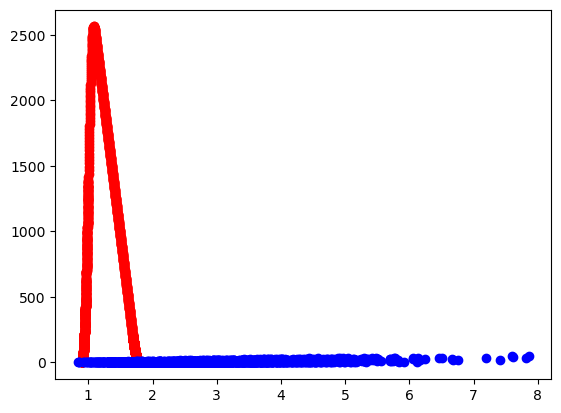

1/1 [==============================] - 0s 18ms/step
[3.0813403 2.9016883]
1/1 [==============================] - 0s 20ms/step
[2.3109186 1.9472268]
1/1 [==============================] - 0s 20ms/step
[2.5421886 2.0480072]
1/1 [==============================] - 0s 20ms/step
[4.990773  3.3885458]
1/1 [==============================] - 0s 17ms/step
[3.1810446 4.8774757]
1/1 [==============================] - 0s 17ms/step
[4.7318892 1.3865398]
1/1 [==============================] - 0s 18ms/step
[2.6022303 3.2726321]
1/1 [==============================] - 0s 20ms/step
[4.232051  2.3898714]
1/1 [==============================] - 0s 18ms/step
[1.2251692 3.1070147]
1/1 [==============================] - 0s 17ms/step
[3.0847108 2.320163 ]
1/1 [==============================] - 0s 17ms/step
[1.4145056 2.3830166]
1/1 [==============================] - 0s 18ms/step
[1.6749945 1.2020584]
1/1 [==============================] - 0s 20ms/step
[4.400269  1.7344003]
1/1 [==============================] -

1/1 [==============================] - 0s 19ms/step
[0.3295815 0.7112341]
1/1 [==============================] - 0s 18ms/step
[0.19881946 0.3424566 ]
1/1 [==============================] - 0s 19ms/step
[0.        0.5477754]
1/1 [==============================] - 0s 18ms/step
[0.7616901 0.       ]
1/1 [==============================] - 0s 18ms/step
[1.1050526 0.       ]
1/1 [==============================] - 0s 23ms/step
[0.0833586  0.24602571]
1/1 [==============================] - 0s 20ms/step
[0.8916721  0.46824527]
1/1 [==============================] - 0s 20ms/step
[0.         0.08198959]
1/1 [==============================] - 0s 19ms/step
[0.46678478 1.6340677 ]
1/1 [==============================] - 0s 20ms/step
[0.25845784 0.        ]
1/1 [==============================] - 0s 19ms/step
[0.         0.60208577]
1/1 [==============================] - 0s 20ms/step
[0.75154537 0.6131945 ]
1/1 [==============================] - 0s 20ms/step
[0.        1.5366466]
1/1 [=================

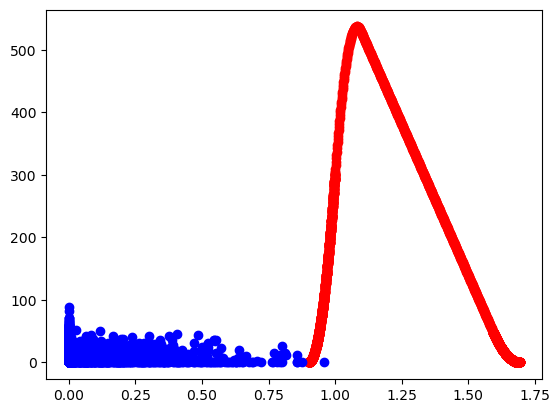

1/1 [==============================] - 0s 18ms/step
[0.96045357 0.        ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.18161018 0.        ]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 21ms/step
[0.        0.2818359]
1/1 [==============================] - 0s 18ms/step
[0.        0.4447286]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.         0.23661196]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [===================

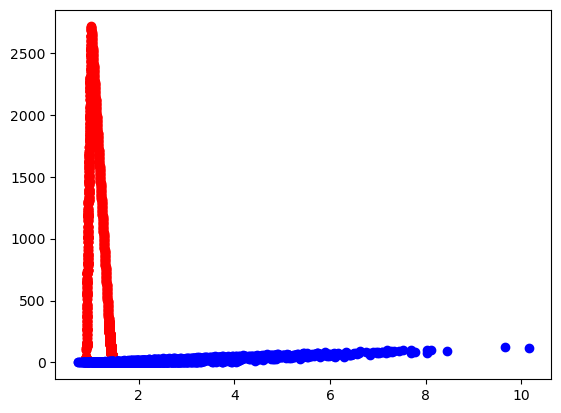

1/1 [==============================] - 0s 20ms/step
[1.6310806 1.7115878]
1/1 [==============================] - 0s 20ms/step
[0.8816749 1.6468686]
1/1 [==============================] - 0s 17ms/step
[6.370577  1.6952238]
1/1 [==============================] - 0s 20ms/step
[1.5660956 2.619801 ]
1/1 [==============================] - 0s 20ms/step
[0.75096405 1.6772959 ]
1/1 [==============================] - 0s 20ms/step
[1.4678441 4.2355313]
1/1 [==============================] - 0s 20ms/step
[3.0988789 2.0543685]
1/1 [==============================] - 0s 19ms/step
[3.0242114 2.241713 ]
1/1 [==============================] - 0s 17ms/step
[2.8474336  0.66699266]
1/1 [==============================] - 0s 68ms/step
[1.6278783 3.361638 ]
1/1 [==============================] - 0s 20ms/step
[0.62044054 1.1849973 ]
1/1 [==============================] - 0s 19ms/step
[3.0439212 0.6322131]
1/1 [==============================] - 0s 18ms/step
[1.8530211 1.3702074]
1/1 [===========================

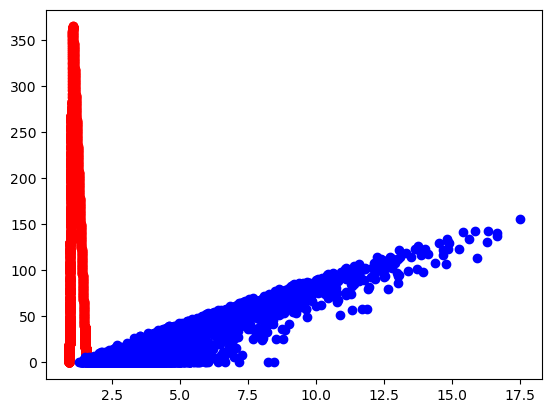

1/1 [==============================] - 0s 20ms/step
[4.978357 6.780479]
1/1 [==============================] - 0s 18ms/step
[2.415271 4.866052]
1/1 [==============================] - 0s 18ms/step
[3.0450852 1.1142125]
1/1 [==============================] - 0s 18ms/step
[1.2279485 5.366823 ]
1/1 [==============================] - 0s 19ms/step
[1.641414  2.8890717]
1/1 [==============================] - 0s 20ms/step
[2.4837875 7.6864724]
1/1 [==============================] - 0s 20ms/step
[2.6190095 2.5363235]
1/1 [==============================] - 0s 18ms/step
[2.012151  4.2574797]
1/1 [==============================] - 0s 18ms/step
[3.3908198 3.040384 ]
1/1 [==============================] - 0s 18ms/step
[2.225262  2.2057836]
1/1 [==============================] - 0s 19ms/step
[5.0995054 3.186956 ]
1/1 [==============================] - 0s 18ms/step
[4.7128425 3.5381296]
1/1 [==============================] - 0s 18ms/step
[7.751207  2.5483851]
1/1 [==============================] - 0s 

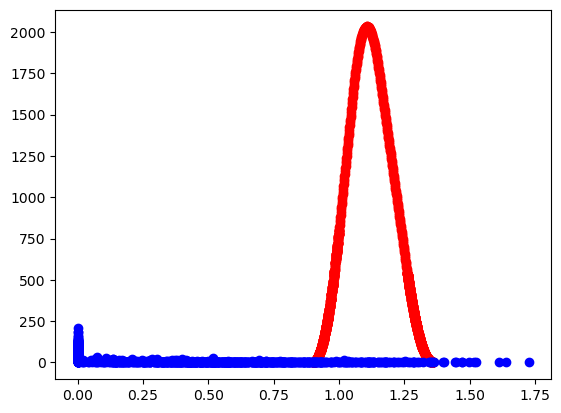

1/1 [==============================] - 0s 18ms/step
[0.00278727 0.        ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.43812025 0.        ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.5687181 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.14618403 0.        ]
1/1 [==============================] - 0s 17ms/step
[0.7862765 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.        0.4689725]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.         0.05373809]
1/1 [==============================] - 0s 18ms/step
[0.18275282 0.9482078 ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.         0.10016878]
1/1 [=================

2023-08-13 18:23:50.180389: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


[5.444036 3.164881]
1/1 [==============================] - 0s 24ms/step
[3.1757221 2.1815186]
1/1 [==============================] - 0s 22ms/step
[2.69908  7.649422]
1/1 [==============================] - 0s 20ms/step
[1.9348463 4.5622034]
1/1 [==============================] - 0s 20ms/step
[13.326137  3.519147]
1/1 [==============================] - 0s 19ms/step
[4.520472  2.9154096]
1/1 [==============================] - 0s 19ms/step
[9.186606 5.449058]
1/1 [==============================] - 0s 19ms/step
[3.474306 6.6751  ]
1/1 [==============================] - 0s 18ms/step
[2.5392852 5.435934 ]
1/1 [==============================] - 0s 19ms/step
[5.1431465 2.9136188]
1/1 [==============================] - 0s 19ms/step
[6.186006 3.439538]
1/1 [==============================] - 0s 19ms/step
[4.153468  3.4176989]
1/1 [==============================] - 0s 21ms/step
[3.2332525 3.2254646]
1/1 [==============================] - 0s 29ms/step
[6.280259  4.1116776]
1/1 [=====================

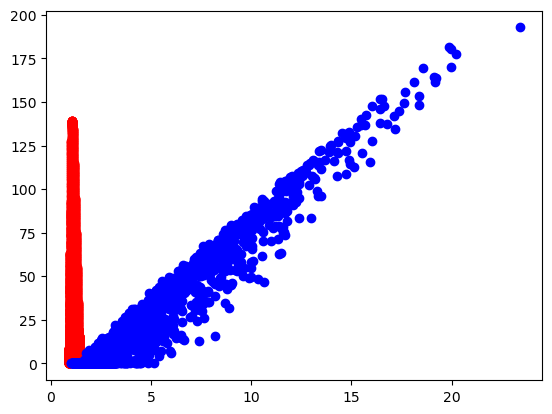

1/1 [==============================] - 0s 18ms/step
[2.577745 4.9057  ]
1/1 [==============================] - 0s 21ms/step
[ 2.763538 14.947673]
1/1 [==============================] - 0s 18ms/step
[ 8.248543 11.830036]
1/1 [==============================] - 0s 17ms/step
[1.5568562 1.3679811]
1/1 [==============================] - 0s 17ms/step
[6.871444  9.7195015]
1/1 [==============================] - 0s 17ms/step
[1.6884638 4.5362716]
1/1 [==============================] - 0s 18ms/step
[4.2323    2.3261428]
1/1 [==============================] - 0s 18ms/step
[3.3600085 0.908125 ]
1/1 [==============================] - 0s 18ms/step
[1.7111062 9.55551  ]
1/1 [==============================] - 0s 19ms/step
[1.3576908 4.47953  ]
1/1 [==============================] - 0s 18ms/step
[1.1302273 1.6658566]
1/1 [==============================] - 0s 18ms/step
[1.5608021 7.462852 ]
1/1 [==============================] - 0s 17ms/step
[4.496714 5.023627]
1/1 [==============================] - 0s 

1999 0.42934781312942505 0.40398550033569336


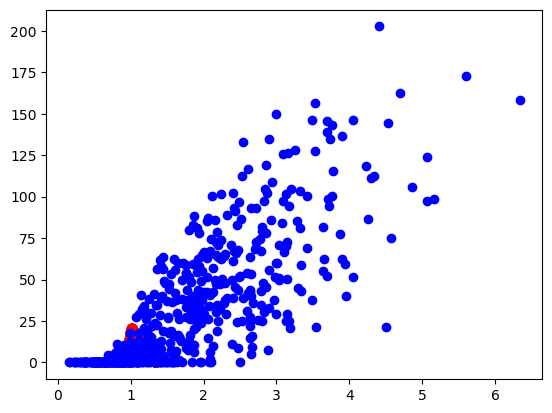

1/1 [==============================] - 0s 21ms/step
[2.5156333 1.5239756]
1/1 [==============================] - 0s 21ms/step
[2.5723398 2.5604851]
1/1 [==============================] - 0s 21ms/step
[3.0761976 3.4483857]
1/1 [==============================] - 0s 20ms/step
[2.7437472  0.74167615]
1/1 [==============================] - 0s 21ms/step
[3.1697164 0.9597374]
1/1 [==============================] - 0s 21ms/step
[2.9432433 3.71909  ]
1/1 [==============================] - 0s 21ms/step
[4.562423 0.595253]
1/1 [==============================] - 0s 22ms/step
[2.4562514 2.7471583]
1/1 [==============================] - 0s 22ms/step
[2.7108889  0.74708354]
1/1 [==============================] - 0s 21ms/step
[2.934829 2.628779]
1/1 [==============================] - 0s 19ms/step
[1.7653627 1.9672534]
1/1 [==============================] - 0s 19ms/step
[1.3474386 1.2008485]
1/1 [==============================] - 0s 20ms/step
[2.7098737 2.2886703]
1/1 [==============================] -

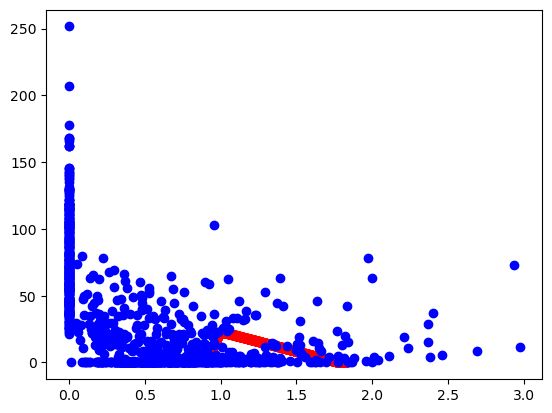

1/1 [==============================] - 0s 18ms/step
[0.61603487 1.2374398 ]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.61712533 0.        ]
1/1 [==============================] - 0s 17ms/step
[1.0584134 0.       ]
1/1 [==============================] - 0s 19ms/step
[1.6346041  0.85698235]
1/1 [==============================] - 0s 19ms/step
[0.        2.0879278]
1/1 [==============================] - 0s 19ms/step
[0.43821228 0.72391593]
1/1 [==============================] - 0s 19ms/step
[1.1713423 0.8861666]
1/1 [==============================] - 0s 17ms/step
[0.71520275 1.5542271 ]
1/1 [==============================] - 0s 17ms/step
[0.5484792 0.808453 ]
1/1 [==============================] - 0s 18ms/step
[1.128266   0.38249004]
1/1 [==============================] - 0s 17ms/step
[1.2234759  0.53251004]
1/1 [==============================] - 0s 17ms/step
[0.82804716 0.        ]
1/1 [==============================]

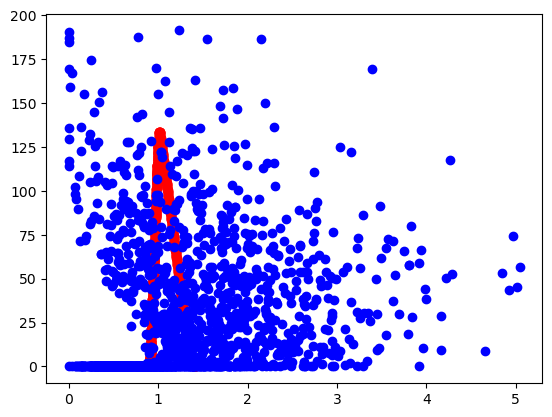

1/1 [==============================] - 0s 18ms/step
[1.0088755 0.7977022]
1/1 [==============================] - 0s 36ms/step
[0.611103  0.5447933]
1/1 [==============================] - 0s 22ms/step
[1.4813483 2.209312 ]
1/1 [==============================] - 0s 19ms/step
[0.07598519 2.3053722 ]
1/1 [==============================] - 0s 21ms/step
[0.33979782 3.1187901 ]
1/1 [==============================] - 0s 19ms/step
[1.6044552 1.2906755]
1/1 [==============================] - 0s 19ms/step
[1.3844967  0.48910245]
1/1 [==============================] - 0s 19ms/step
[0.03187194 5.182817  ]
1/1 [==============================] - 0s 20ms/step
[0.88288414 1.7660412 ]
1/1 [==============================] - 0s 20ms/step
[0.35823578 1.5845083 ]
1/1 [==============================] - 0s 20ms/step
[0.9465957 2.6586485]
1/1 [==============================] - 0s 20ms/step
[2.3720257 1.0976989]
1/1 [==============================] - 0s 21ms/step
[0.9653884 2.912032 ]
1/1 [=====================

1/1 [==============================] - 0s 20ms/step
[0.03216098 1.1961591 ]
1/1 [==============================] - 0s 21ms/step
[1.0548066 1.6050153]
1/1 [==============================] - 0s 20ms/step
[1.6628717  0.84889376]
1/1 [==============================] - 0s 17ms/step
[0.7177656 0.3408675]
1/1 [==============================] - 0s 19ms/step
[0.0929852 2.3133347]
1/1 [==============================] - 0s 20ms/step
[0.6184467  0.10482197]
1/1 [==============================] - 0s 20ms/step
[1.1753526 2.0313103]
1/1 [==============================] - 0s 20ms/step
[0.        0.6105832]
1/1 [==============================] - 0s 19ms/step
[1.3922073  0.47065026]
1/1 [==============================] - 0s 18ms/step
[1.1936189  0.55426484]
1/1 [==============================] - 0s 19ms/step
[1.4600984 0.       ]
1/1 [==============================] - 0s 18ms/step
[1.6114371 0.       ]
1/1 [==============================] - 0s 17ms/step
[0.87120295 0.00545987]
1/1 [=====================

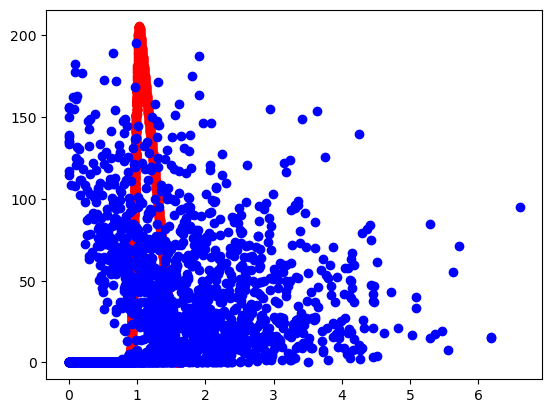

1/1 [==============================] - 0s 18ms/step
[0.91148716 2.4949107 ]
1/1 [==============================] - 0s 17ms/step
[0.8814792  0.23823465]
1/1 [==============================] - 0s 19ms/step
[2.7620745 1.6464903]
1/1 [==============================] - 0s 17ms/step
[0.27937424 0.5128366 ]
1/1 [==============================] - 0s 20ms/step
[1.2533407 2.7175663]
1/1 [==============================] - 0s 18ms/step
[0.00658065 0.6097925 ]
1/1 [==============================] - 0s 20ms/step
[0.834048  1.1619166]
1/1 [==============================] - 0s 19ms/step
[2.5228732 1.0444648]
1/1 [==============================] - 0s 18ms/step
[0.51029474 1.8724736 ]
1/1 [==============================] - 0s 20ms/step
[0.03594484 0.35776532]
1/1 [==============================] - 0s 20ms/step
[1.0579267 2.8289032]
1/1 [==============================] - 0s 19ms/step
[1.9326627 2.489975 ]
1/1 [==============================] - 0s 20ms/step
[0.0770976 2.3708086]
1/1 [=====================

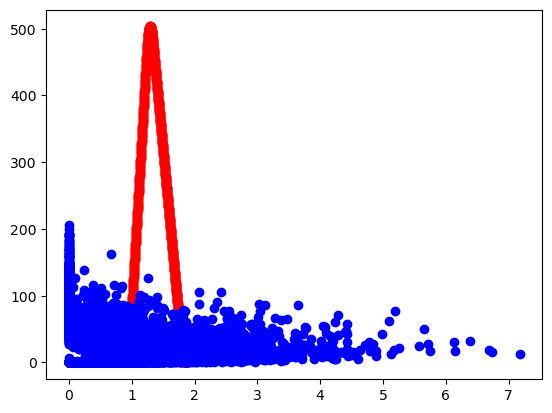

1/1 [==============================] - 0s 18ms/step
[0.4510061 0.       ]
1/1 [==============================] - 0s 17ms/step
[0.3484195 1.271627 ]
1/1 [==============================] - 0s 17ms/step
[0.        0.6389766]
1/1 [==============================] - 0s 17ms/step
[1.5536374 0.       ]
1/1 [==============================] - 0s 18ms/step
[1.8178263 0.8990389]
1/1 [==============================] - 0s 20ms/step
[2.0424688 1.5767903]
1/1 [==============================] - 0s 18ms/step
[0.        0.8332752]
1/1 [==============================] - 0s 18ms/step
[1.6882789 2.7487938]
1/1 [==============================] - 0s 20ms/step
[0.       3.236682]
1/1 [==============================] - 0s 17ms/step
[0.        1.5570258]
1/1 [==============================] - 0s 17ms/step
[0.3229031 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.        2.8917227]
1/1 [==============================] - 0s 18ms/step
[1.7873682 0.4373569]
1/1 [==============================] - 0

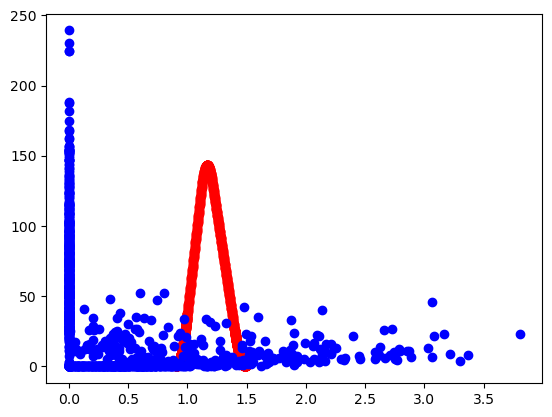

1/1 [==============================] - 0s 21ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.9641857 0.       ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[1.1587958 0.       ]
1/1 [==============================] - 0s 18ms/step
[1.4143972 0.       ]
1/1 [==============================] - 0s 21ms/step
[0.49020642 0.        ]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.        1.4912987]
1/1 [==============================] - 0s 18ms/step
[0.         0.19162819]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.6097725 0.       ]
1/1 [==============================] - 0s 17ms/step
[0.745

1/1 [==============================] - 0s 18ms/step
[0.        2.5556521]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[1.9130254 2.9045718]
1/1 [==============================] - 0s 20ms/step
[2.2499938 0.9424792]
1/1 [==============================] - 0s 19ms/step
[0.        2.6388345]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[1.9450133 0.9474302]
1/1 [==============================] - 0s 19ms/step
[0.7208636 2.0311575]
1/1 [==============================] - 0s 18ms/step
[1.0128446 0.9570489]
1/1 [==============================] - 0s 17ms/step
[2.9612238 3.007714 ]
1/1 [==============================] - 0s 19ms/step
[0.7929376 0.6941452]
1/1 [==============================] - 0s 20ms/step
[0.7237233 2.1546528]
1/1 [==============================] - 0s 17ms/step
[0.9324077  0.15739961]
1/1 [==============================] - 0s 19ms/step
[3.5660133 5

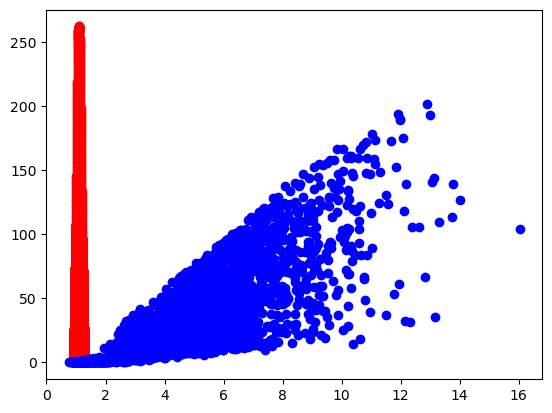

1/1 [==============================] - 0s 18ms/step
[6.053861 6.978415]
1/1 [==============================] - 0s 17ms/step
[5.4101152 2.4911203]
1/1 [==============================] - 0s 18ms/step
[2.8296733 5.7791924]
1/1 [==============================] - 0s 17ms/step
[2.0578098 6.9117093]
1/1 [==============================] - 0s 17ms/step
[5.668194  3.6198614]
1/1 [==============================] - 0s 18ms/step
[5.4363723 4.082619 ]
1/1 [==============================] - 0s 19ms/step
[6.371499  1.8923129]
1/1 [==============================] - 0s 18ms/step
[2.0387392 1.7930776]
1/1 [==============================] - 0s 17ms/step
[4.80698   2.9181843]
1/1 [==============================] - 0s 18ms/step
[2.3593554 1.2473967]
1/1 [==============================] - 0s 17ms/step
[3.0535264 7.1449704]
1/1 [==============================] - 0s 18ms/step
[2.4027653 2.5249667]
1/1 [==============================] - 0s 25ms/step
[3.1261823 2.56681  ]
1/1 [==============================] - 0

1/1 [==============================] - 0s 21ms/step
[0.23574495 0.        ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[1.6107638  0.51246333]
1/1 [==============================] - 0s 18ms/step
[1.595107  1.4978455]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[1.5123868 0.       ]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.       0.673731]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[1.8468591 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.        0.6351895]
1/1 [==============================] - 0s 18ms/step
[0.         0.60675484]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 18

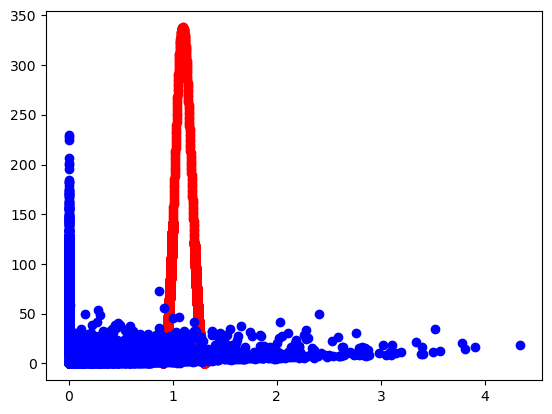

1/1 [==============================] - 0s 21ms/step
[0.2663608 1.0053564]
1/1 [==============================] - 0s 19ms/step
[0.38046497 0.        ]
1/1 [==============================] - 0s 18ms/step
[1.3807826 0.       ]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.5052546 0.       ]
1/1 [==============================] - 0s 19ms/step
[0.         0.17848264]
1/1 [==============================] - 0s 18ms/step
[0.16258644 0.        ]
1/1 [==============================] - 0s 18ms/step
[0.09101382 0.        ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.        1.1740825]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.3667161 2.1384614]
1/1 [==============================] - 0s 17ms/step
[0.3396267  0.00582924]
1/1 [=====

3599 0.0 1.0


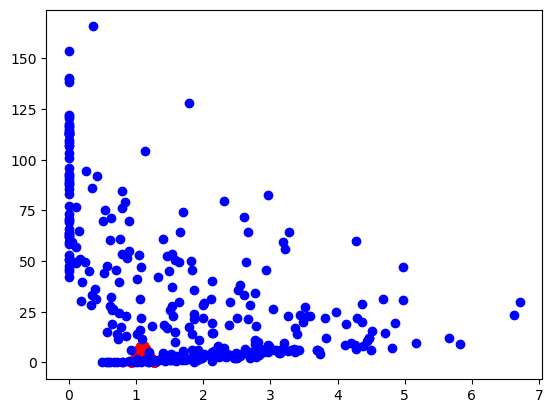

1/1 [==============================] - 0s 21ms/step
[2.2050066 1.8468053]
1/1 [==============================] - 0s 19ms/step
[0.        3.6364315]
1/1 [==============================] - 0s 21ms/step
[1.5058005 2.7411497]
1/1 [==============================] - 0s 21ms/step
[2.6903372 3.7640643]
1/1 [==============================] - 0s 20ms/step
[0.        2.4498422]
1/1 [==============================] - 0s 21ms/step
[0.       4.223788]
1/1 [==============================] - 0s 21ms/step
[1.0466332 0.9438034]
1/1 [==============================] - 0s 18ms/step
[3.2647936  0.88768464]
1/1 [==============================] - 0s 19ms/step
[1.9218892 0.       ]
1/1 [==============================] - 0s 19ms/step
[0.       2.534642]
1/1 [==============================] - 0s 19ms/step
[1.5602281 1.6919578]
1/1 [==============================] - 0s 20ms/step
[1.3982416 1.4429433]
1/1 [==============================] - 0s 18ms/step
[1.4210033 2.0288286]
1/1 [==============================] - 0

3799 1.0 0.45114943385124207


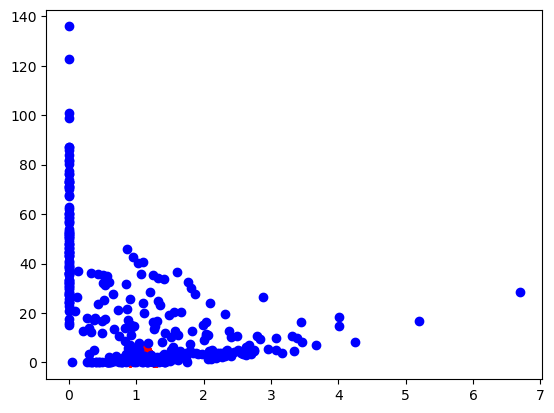

1/1 [==============================] - 0s 18ms/step
[1.7864249  0.72530055]
1/1 [==============================] - 0s 17ms/step
[1.2642399  0.46564066]
1/1 [==============================] - 0s 17ms/step
[2.7992961 0.       ]
1/1 [==============================] - 0s 17ms/step
[0.        1.2301229]
1/1 [==============================] - 0s 17ms/step
[1.9494727 0.8678539]
1/1 [==============================] - 0s 19ms/step
[1.5383152 2.473335 ]
1/1 [==============================] - 0s 18ms/step
[0.64823616 0.        ]
1/1 [==============================] - 0s 17ms/step
[1.1902745 0.       ]
1/1 [==============================] - 0s 19ms/step
[0.39666864 0.        ]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.        1.4692874]
1/1 [==============================] - 0s 18ms/step
[3.0398421 2.86673  ]
1/1 [==============================] - 0s 17ms/step
[3.78855   0.8139293]
1/1 [==============================] - 0s 18

1/1 [==============================] - 0s 21ms/step
[0.         0.08980186]
1/1 [==============================] - 0s 20ms/step
[1.3211917  0.45084664]
1/1 [==============================] - 0s 17ms/step
[0.7826218 0.9501312]
1/1 [==============================] - 0s 17ms/step
[2.9036653 1.1008512]
1/1 [==============================] - 0s 18ms/step
[6.776842  1.4544865]
1/1 [==============================] - 0s 17ms/step
[1.6776962 0.8242787]
1/1 [==============================] - 0s 17ms/step
[3.856568  1.0605235]
1/1 [==============================] - 0s 19ms/step
[1.5715553 1.3669691]
1/1 [==============================] - 0s 18ms/step
[0.         0.85673165]
1/1 [==============================] - 0s 18ms/step
[0.        1.8736465]
1/1 [==============================] - 0s 21ms/step
[3.3612454 1.0800488]
1/1 [==============================] - 0s 20ms/step
[1.397545 0.      ]
1/1 [==============================] - 0s 20ms/step
[3.1261072 1.2349188]
1/1 [=============================

3999 0.9568965435028076 0.5545976758003235


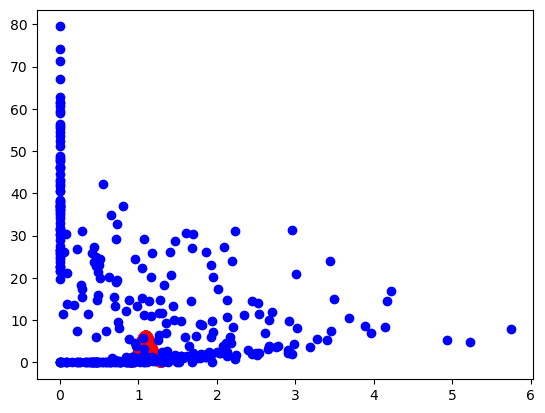

1/1 [==============================] - 0s 19ms/step
[1.7006226 0.       ]
1/1 [==============================] - 0s 19ms/step
[0.9177053 1.8595344]
1/1 [==============================] - 0s 17ms/step
[1.002889   0.43975937]
1/1 [==============================] - 0s 17ms/step
[0.8654443  0.90424716]
1/1 [==============================] - 0s 19ms/step
[0.         0.27831304]
1/1 [==============================] - 0s 18ms/step
[1.3898003 2.0890455]
1/1 [==============================] - 0s 17ms/step
[2.519884  0.9211211]
1/1 [==============================] - 0s 17ms/step
[2.0639646 0.       ]
1/1 [==============================] - 0s 20ms/step
[0.62781084 1.5076073 ]
1/1 [==============================] - 0s 17ms/step
[2.3665462 0.8758463]
1/1 [==============================] - 0s 17ms/step
[1.4091531 1.9431764]
1/1 [==============================] - 0s 17ms/step
[0.6197289 1.1180928]
1/1 [==============================] - 0s 17ms/step
[2.2200975 0.5231726]
1/1 [=========================

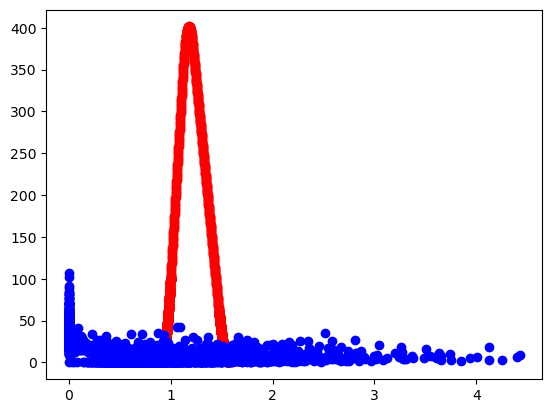

1/1 [==============================] - 0s 21ms/step
[2.6094868 1.9252   ]
1/1 [==============================] - 0s 17ms/step
[0.6303594 3.1560931]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[2.1466038 0.       ]
1/1 [==============================] - 0s 20ms/step
[0.45440203 1.9059852 ]
1/1 [==============================] - 0s 19ms/step
[1.7500778 1.9035997]
1/1 [==============================] - 0s 19ms/step
[0.24756247 0.        ]
1/1 [==============================] - 0s 17ms/step
[0.       1.416263]
1/1 [==============================] - 0s 19ms/step
[0.35874003 0.        ]
1/1 [==============================] - 0s 19ms/step
[0.39944553 0.81945735]
1/1 [==============================] - 0s 18ms/step
[1.8047878 0.       ]
1/1 [==============================] - 0s 19ms/step
[0.7417093  0.64670926]
1/1 [==============================] - 0s 19ms/step
[1.9074183 2.0782032]
1/1 [==============================] - 0s 18

4399 0.0 0.513863205909729


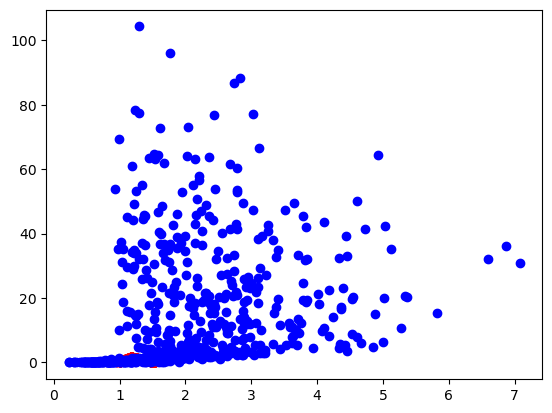

1/1 [==============================] - 0s 19ms/step
[3.1529982 4.355852 ]
1/1 [==============================] - 0s 18ms/step
[2.7146308 2.1302366]
1/1 [==============================] - 0s 19ms/step
[2.836396  1.0269285]
1/1 [==============================] - 0s 18ms/step
[2.8876112 1.5985122]
1/1 [==============================] - 0s 18ms/step
[0.9468001  0.80593944]
1/1 [==============================] - 0s 17ms/step
[3.4105237  0.67695314]
1/1 [==============================] - 0s 18ms/step
[0.5856566 1.3270596]
1/1 [==============================] - 0s 20ms/step
[1.1727266 3.2863443]
1/1 [==============================] - 0s 19ms/step
[2.1110733 2.5774846]
1/1 [==============================] - 0s 19ms/step
[2.5973325 3.3623936]
1/1 [==============================] - 0s 20ms/step
[1.2738982 2.0733411]
1/1 [==============================] - 0s 20ms/step
[0.8145345 1.5986378]
1/1 [==============================] - 0s 18ms/step
[2.521789  0.6583033]
1/1 [=============================

1/1 [==============================] - 0s 17ms/step
[0.5075907 0.905571 ]
1/1 [==============================] - 0s 18ms/step
[0.21009393 0.        ]
1/1 [==============================] - 0s 18ms/step
[0.50154436 0.        ]
1/1 [==============================] - 0s 19ms/step
[1.3850993 1.4297522]
1/1 [==============================] - 0s 19ms/step
[0.44315434 1.5085453 ]
1/1 [==============================] - 0s 17ms/step
[0.4488266 1.7909623]
1/1 [==============================] - 0s 17ms/step
[0.9347654 1.9815483]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.65661967 0.49229145]
1/1 [==============================] - 0s 17ms/step
[3.0766644  0.75659496]
1/1 [==============================] - 0s 19ms/step
[1.4660871  0.99870276]
1/1 [==============================] - 0s 20ms/step
[1.7854937  0.75202614]
1/1 [==============================] - 0s 18ms/step
[0.54075843 0.3774103 ]
1/1 [==============================]

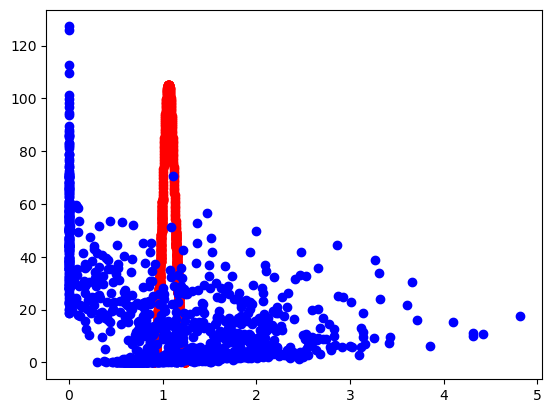

1/1 [==============================] - 0s 21ms/step
[0.6623327 0.7119677]
1/1 [==============================] - 0s 17ms/step
[1.3026408 2.887344 ]
1/1 [==============================] - 0s 19ms/step
[0.87562174 1.9650216 ]
1/1 [==============================] - 0s 17ms/step
[0.         0.39511633]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[2.0625305 0.5280801]
1/1 [==============================] - 0s 17ms/step
[1.1299195  0.56632805]
1/1 [==============================] - 0s 17ms/step
[0.         0.65989876]
1/1 [==============================] - 0s 17ms/step
[1.8180944 3.9661152]
1/1 [==============================] - 0s 17ms/step
[0.        1.3263203]
1/1 [==============================] - 0s 17ms/step
[0.7746865 0.3730142]
1/1 [==============================] - 0s 18ms/step
[0.05073312 0.5484767 ]
1/1 [==============================] - 0s 17ms/step
[1.699286   0.77353287]
1/1 [==============================] - 0

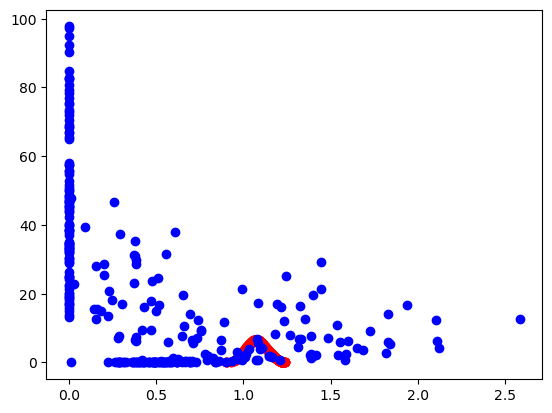

1/1 [==============================] - 0s 31ms/step
[1.5480345  0.43666434]
1/1 [==============================] - 0s 20ms/step
[0.         0.58610696]
1/1 [==============================] - 0s 18ms/step
[0.        1.4008586]
1/1 [==============================] - 0s 17ms/step
[0.         0.57948554]
1/1 [==============================] - 0s 23ms/step
[1.574686 1.132249]
1/1 [==============================] - 0s 20ms/step
[1.3190876 0.       ]
1/1 [==============================] - 0s 21ms/step
[0.         0.15418088]
1/1 [==============================] - 0s 19ms/step
[1.2564943 0.3346598]
1/1 [==============================] - 0s 19ms/step
[1.266858  0.5469248]
1/1 [==============================] - 0s 18ms/step
[0.658815  1.0004447]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.9907248  0.36355972]
1/1 [==============================] - 0s 20ms/step
[0.        1.4463278]
1/1 [==============================] - 0s 20

4999 0.0 1.0


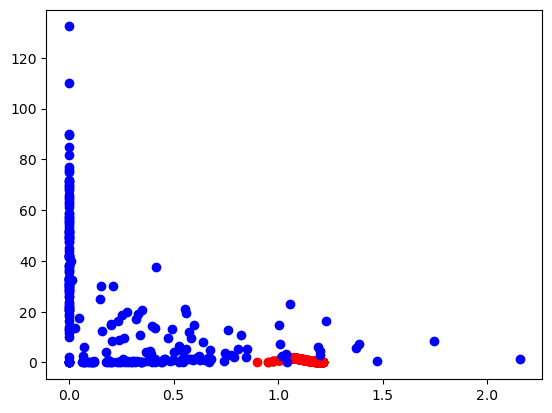

1/1 [==============================] - 0s 19ms/step
[0.26358458 0.        ]
1/1 [==============================] - 0s 19ms/step
[0.         0.13132542]
1/1 [==============================] - 0s 18ms/step
[0.00257207 0.6180181 ]
1/1 [==============================] - 0s 17ms/step
[0.        0.8680075]
1/1 [==============================] - 0s 17ms/step
[0.69464254 0.57456493]
1/1 [==============================] - 0s 17ms/step
[0.78407925 0.        ]
1/1 [==============================] - 0s 18ms/step
[1.0656644 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.33979404 0.10674154]
1/1 [==============================] - 0s 18ms/step
[0.5754764 0.       ]
1/1 [==============================] - 0s 17ms/step
[0.4865371  0.22449094]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[0.2826021  0.07977544]
1/1 [==============================] - 0s 17ms/ste

5199 0.13600000739097595 0.7573333382606506


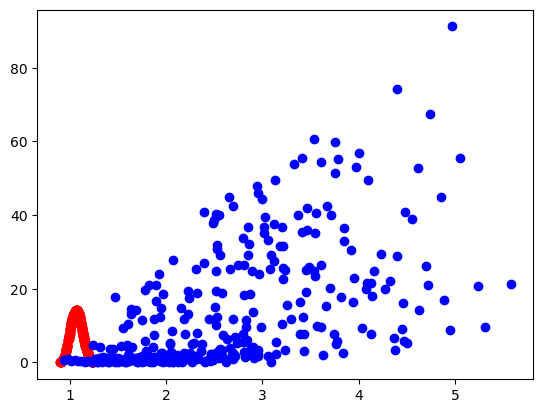

1/1 [==============================] - 0s 19ms/step
[1.5523425 2.1197724]
1/1 [==============================] - 0s 18ms/step
[2.1573625 1.7153571]
1/1 [==============================] - 0s 18ms/step
[1.1843234 1.7084303]
1/1 [==============================] - 0s 17ms/step
[5.2383585 2.232557 ]
1/1 [==============================] - 0s 20ms/step
[2.2057958 1.8497026]
1/1 [==============================] - 0s 20ms/step
[1.3941648 2.784779 ]
1/1 [==============================] - 0s 19ms/step
[1.9322804 3.340865 ]
1/1 [==============================] - 0s 18ms/step
[2.862502  3.7585225]
1/1 [==============================] - 0s 20ms/step
[3.6328115 2.040846 ]
1/1 [==============================] - 0s 18ms/step
[1.682219 2.265687]
1/1 [==============================] - 0s 17ms/step
[2.2244377 5.717599 ]
1/1 [==============================] - 0s 18ms/step
[4.5827875 1.4417226]
1/1 [==============================] - 0s 20ms/step
[1.8433326 1.2462455]
1/1 [==============================] - 0

5399 0.9018036127090454 0.625250518321991


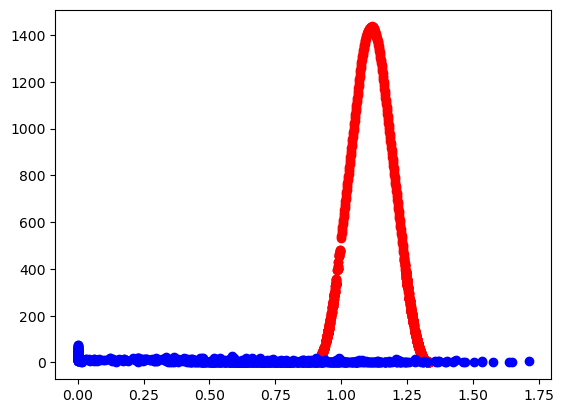

1/1 [==============================] - 0s 21ms/step
[0.        0.5566239]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.5858909 0.7065914]
1/1 [==============================] - 0s 19ms/step
[0.60182595 0.        ]
1/1 [==============================] - 0s 20ms/step
[0.         0.99262714]
1/1 [==============================] - 0s 19ms/step
[1.0472047  0.76714164]
1/1 [==============================] - 0s 21ms/step
[0.        0.8497295]
1/1 [==============================] - 0s 20ms/step
[0.33664957 1.1891224 ]
1/1 [==============================] - 0s 25ms/step
[0.         0.28772187]
1/1 [==============================] - 0s 21ms/step
[0.26666003 0.        ]
1/1 [==============================] - 0s 20ms/step
[0.6393057 0.       ]
1/1 [==============================] - 0s 31ms/step
[0.9068046 0.       ]
1/1 [==============================] - 0s 22ms/step
[0.01415646 0.        ]
1/1 [==============================] -

2023-08-13 18:27:50.210673: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 19ms/step
[0.64681834 0.37487692]
1/1 [==============================] - 0s 20ms/step
[0.5070393 0.       ]
1/1 [==============================] - 0s 20ms/step
[0.7379581 0.8689894]
1/1 [==============================] - 0s 19ms/step
[0.7153477  0.01736262]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.82709384 0.        ]
1/1 [==============================] - 0s 19ms/step
[0.         0.27314228]
1/1 [==============================] - 0s 18ms/step
[1.1949333 0.8890869]
1/1 [==============================] - 0s 19ms/step
[0.6909945 0.7038673]
1/1 [==============================] - 0s 19ms/step
[0.6292472 1.0523798]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[1.0732366 0.       ]
1/1 [==============================] - 0s 24ms/step
[0.82517284 0.6952425 ]
1/1 [==============================] - 0s 19ms/step
[0.0

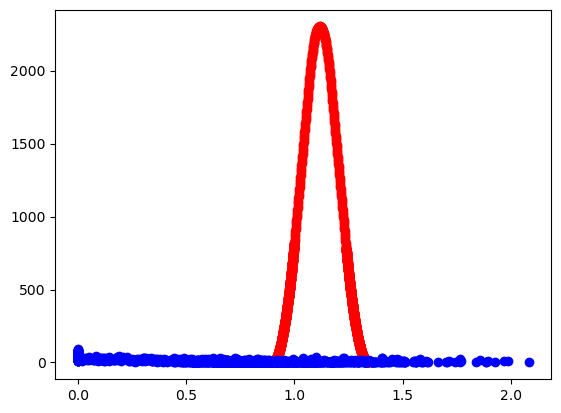

1/1 [==============================] - 0s 19ms/step
[0.         0.04991318]
1/1 [==============================] - 0s 18ms/step
[0.        1.5074252]
1/1 [==============================] - 0s 17ms/step
[1.3674532  0.97732437]
1/1 [==============================] - 0s 17ms/step
[1.1612861 0.       ]
1/1 [==============================] - 0s 19ms/step
[1.197129  1.1932425]
1/1 [==============================] - 0s 17ms/step
[0.        0.5729045]
1/1 [==============================] - 0s 17ms/step
[0.2717661 1.013157 ]
1/1 [==============================] - 0s 17ms/step
[0.87386084 0.941514  ]
1/1 [==============================] - 0s 17ms/step
[1.0993663 0.       ]
1/1 [==============================] - 0s 17ms/step
[0.74508756 0.        ]
1/1 [==============================] - 0s 17ms/step
[0.7926773  0.55554724]
1/1 [==============================] - 0s 18ms/step
[0.8058692 0.5552371]
1/1 [==============================] - 0s 17ms/step
[0.        0.8521402]
1/1 [=======================

5799 0.5256064534187317 0.7816711664199829


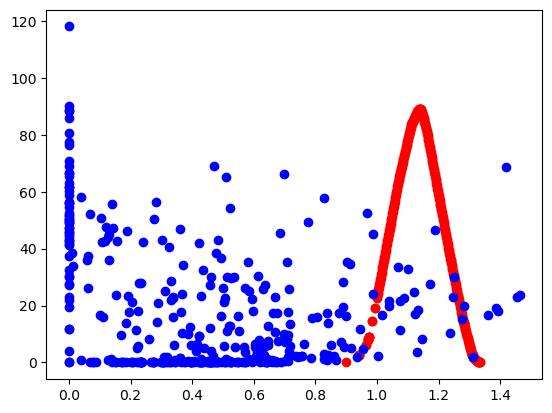

1/1 [==============================] - 0s 18ms/step
[0.         0.56993145]
1/1 [==============================] - 0s 21ms/step
[0.29053316 0.28274506]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.        0.5278519]
1/1 [==============================] - 0s 20ms/step
[0.18665901 0.3617671 ]
1/1 [==============================] - 0s 19ms/step
[0.32435474 0.        ]
1/1 [==============================] - 0s 19ms/step
[0.         0.10133845]
1/1 [==============================] - 0s 18ms/step
[0.         0.62401867]
1/1 [==============================] - 0s 18ms/step
[0.         0.03510205]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.24642514 0.        ]
1/1 [==============================] - 0s 17ms/step
[0.         0.10876485]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.       

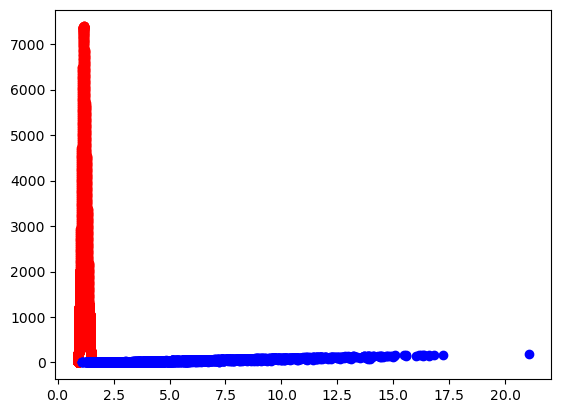

1/1 [==============================] - 0s 19ms/step
[4.8751636 1.5071914]
1/1 [==============================] - 0s 18ms/step
[3.5926225 6.7453866]
1/1 [==============================] - 0s 17ms/step
[2.4350092 5.1779037]
1/1 [==============================] - 0s 17ms/step
[6.958104 7.035476]
1/1 [==============================] - 0s 17ms/step
[7.1935716 7.527084 ]
1/1 [==============================] - 0s 17ms/step
[8.539486  2.5452013]
1/1 [==============================] - 0s 17ms/step
[4.810479 9.307118]
1/1 [==============================] - 0s 17ms/step
[3.085353 3.205828]
1/1 [==============================] - 0s 17ms/step
[2.389045 7.33667 ]
1/1 [==============================] - 0s 18ms/step
[ 4.4442787 11.072668 ]
1/1 [==============================] - 0s 18ms/step
[3.2427452 1.6147842]
1/1 [==============================] - 0s 17ms/step
[3.305907  5.1221275]
1/1 [==============================] - 0s 17ms/step
[8.771203 9.251299]
1/1 [==============================] - 0s 19ms

6199 0.7159686088562012 0.4751308858394623


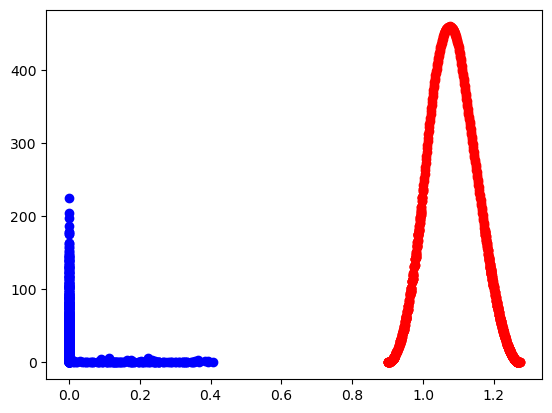

1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.18785977 0.18750766]
1/1 [==============================] - 0s 22ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 21ms/step
[0. 0.]
1/1 [==============================] - 0s 21ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.         0.23846956]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0.10452353 0.        ]
1/1 [==============================] - 0s 19ms/step
[0.2985242 0.       ]
1/1 [==============================] - 0s 20ms/step
[0.         0.32830355]
1/1 [==============================] - 0s 20ms/step
[0.        0.3624221]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [===

6399 0.5806878209114075 0.6693121790885925


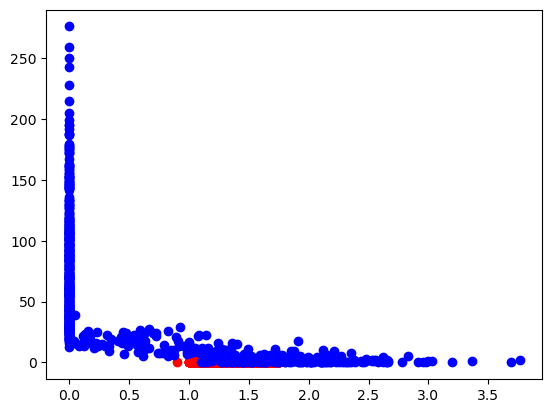

1/1 [==============================] - 0s 19ms/step
[0.20758936 0.        ]
1/1 [==============================] - 0s 19ms/step
[3.1583214 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.       1.632494]
1/1 [==============================] - 0s 17ms/step
[1.405429  2.0865612]
1/1 [==============================] - 0s 20ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[1.9984682 1.5505915]
1/1 [==============================] - 0s 18ms/step
[0.        1.6441491]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[1.7242877 0.       ]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 20ms/step
[0.7126405 1.0554779]
1/1 [==============================] - 0s 19ms/step
[0.        0.5941044]
1/1 [==============================] - 0s 19ms/step
[0.4567113 0.       ]
1/1 [===============

1/1 [==============================] - 0s 18ms/step
[ 9.280649 12.614385]
1/1 [==============================] - 0s 18ms/step
[6.111621  3.0101516]
1/1 [==============================] - 0s 17ms/step
[ 6.505055 16.353458]
1/1 [==============================] - 0s 17ms/step
[7.068396 7.211754]
1/1 [==============================] - 0s 17ms/step
[2.2862155 5.1648293]
1/1 [==============================] - 0s 18ms/step
[4.8145475 4.064572 ]
1/1 [==============================] - 0s 18ms/step
[ 9.242713 21.283321]
1/1 [==============================] - 0s 18ms/step
[3.0840027 3.476796 ]
1/1 [==============================] - 0s 17ms/step
[9.993201  6.7659597]
1/1 [==============================] - 0s 17ms/step
[6.9224005 7.6002264]
1/1 [==============================] - 0s 18ms/step
[15.026989 27.84132 ]
1/1 [==============================] - 0s 17ms/step
[ 3.1298048 11.109174 ]
1/1 [==============================] - 0s 18ms/step
[13.725798 15.49629 ]
1/1 [==============================] -

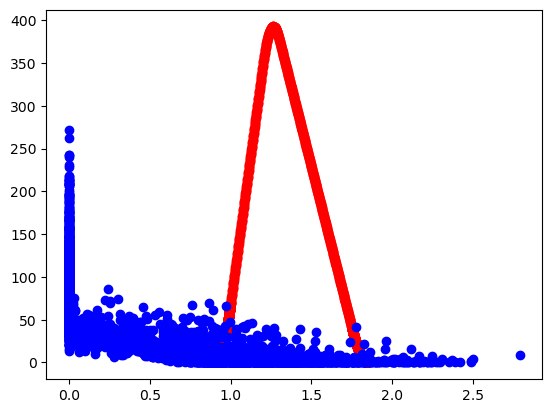

1/1 [==============================] - 0s 18ms/step
[0.        1.6466041]
1/1 [==============================] - 0s 17ms/step
[1.6861525 0.       ]
1/1 [==============================] - 0s 17ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.        1.6256007]
1/1 [==============================] - 0s 19ms/step
[1.1767823 0.       ]
1/1 [==============================] - 0s 18ms/step
[0.8818568 0.       ]
1/1 [==============================] - 0s 19ms/step
[0.        1.7897015]
1/1 [==============================] - 0s 19ms/step
[1.4978042 0.       ]
1/1 [==============================] - 0s 18ms/step
[0. 0.]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 17ms/step
[0.45020747 0.        ]
1/1 [==============================] - 0s 19ms/step
[0. 0.]
1/1 [==============================] - 0s 18ms/step
[0.      0.97918]
1/1 [==============================] - 0s 20ms/step
[0.80646783 0.        ]
1/1 [===============

KeyboardInterrupt: 

In [55]:
# train the generator and discriminator
# manually enumerate epochs
for i in range(len(dataset)):
    # prepare real samples
    x_real, y_real = generate_real_samples(i)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, len(dataset[i]))
    # update discriminator
    discriminator.train_on_batch(x_real, y_real)
    discriminator.train_on_batch(x_fake, y_fake)
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, len(dataset[i]))
    # create inverted labels for the fake samples
    y_gan = ones((len(dataset[i]), 1))
    # update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)
    # evaluate the model every n_eval epochs
    if (i + 1) % 200 == 0:
        summarize_performance(i, generator, discriminator, latent_dim)


In [191]:
xi,yi = generate_fake_samples(generator, 5, 10, target_range=(0.9, 1.8))
print(xi)

[[ 1.58144374  0.64032735  0.37083678  0.8112904   1.17669188]
 [ 0.22919279 -1.29429703  2.11942742 -0.82048951 -0.16487584]
 [-0.09897697  0.05216464 -1.76468434  0.36798618 -0.61919742]
 [-0.07631053  0.50299105  0.55871427  2.29674637 -0.41478907]
 [-1.82656017 -0.76833898  0.0428787  -0.15176504  1.17887449]
 [ 1.89931538  2.22987881  0.22146128 -0.6203513  -0.41583372]
 [-0.43701996  0.27756594 -1.41263108 -0.19099424 -0.53490337]
 [-0.06314727 -0.21344552  0.17702491 -0.88013598 -0.18716464]
 [ 0.54672055  1.13416827 -1.21561818  2.15487424  0.16405571]
 [ 0.16082355 -0.25081976  0.78825707  0.22695677  0.14007687]]
1/1 [==============================] - 0s 41ms/step
[[2.0529811  1.5312526 ]
 [1.0364108  2.0474517 ]
 [1.0443673  1.8266654 ]
 [1.3530359  1.4969106 ]
 [1.3398688  1.7382321 ]
 [1.4225835  1.1219256 ]
 [1.1161267  1.1700058 ]
 [1.1896905  1.01652   ]
 [1.3144684  1.6237657 ]
 [1.4267455  0.98598063]]


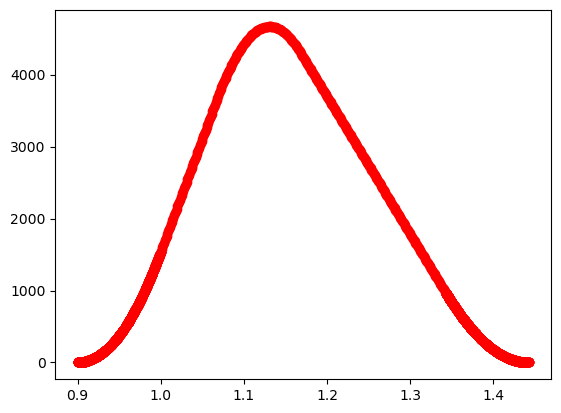

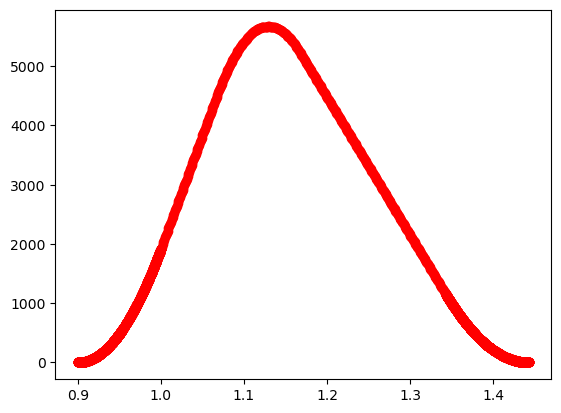

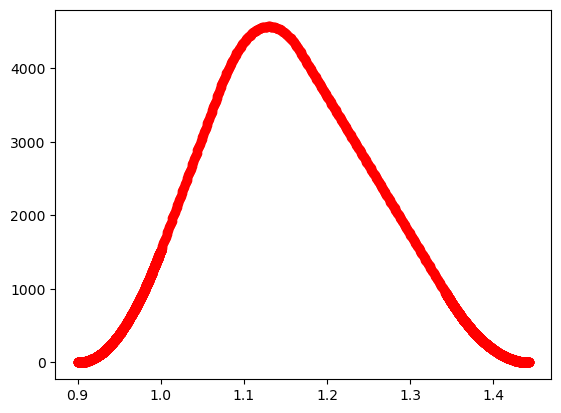

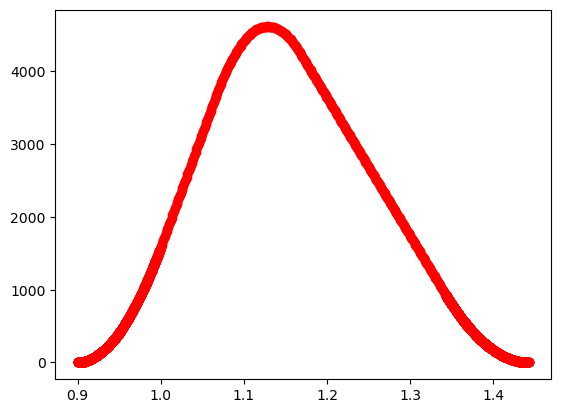

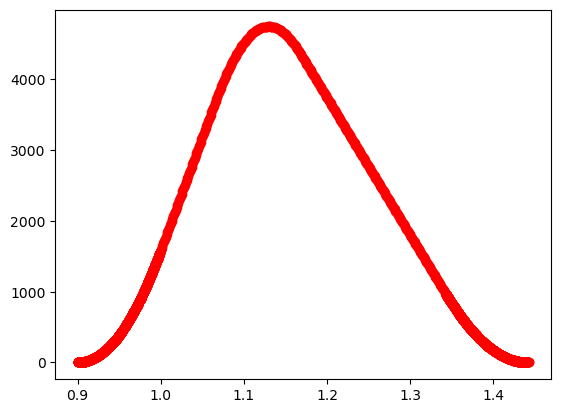

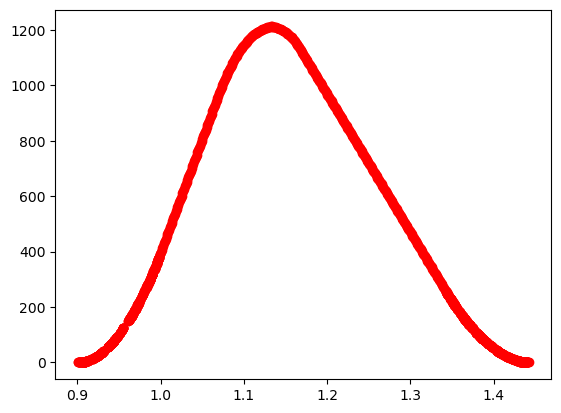

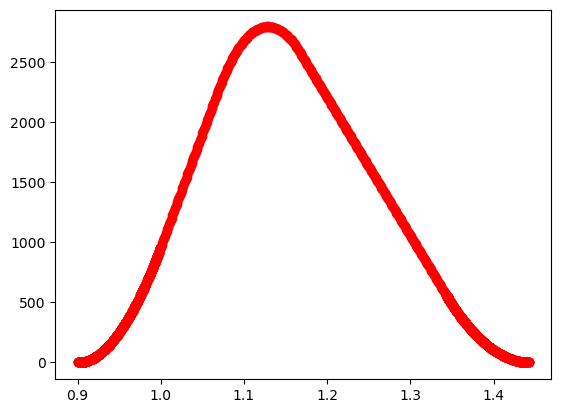

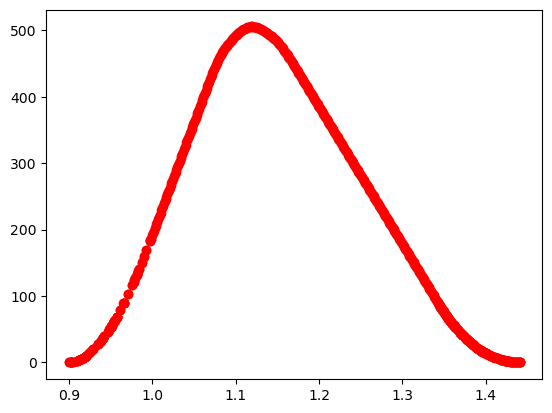

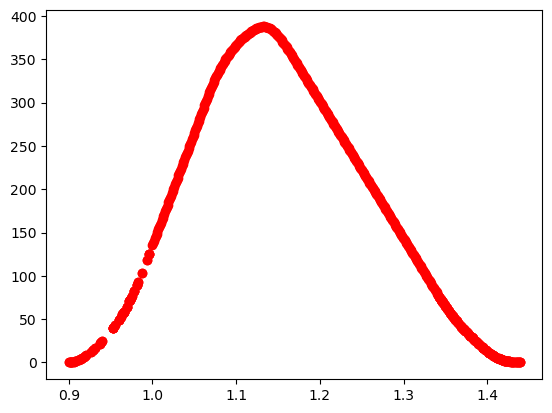

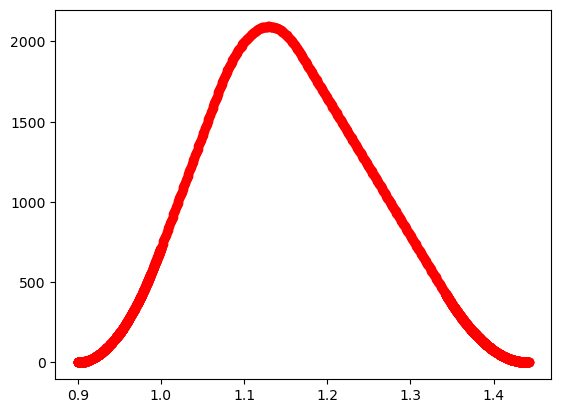

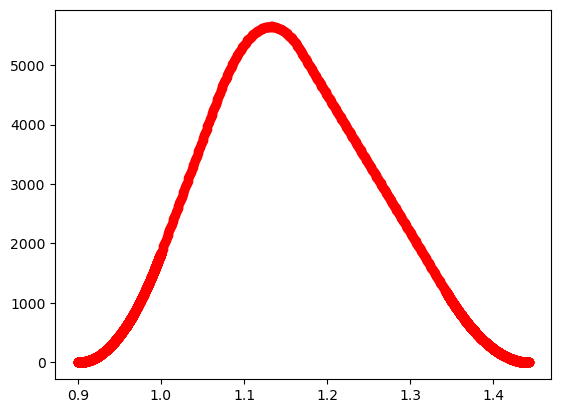

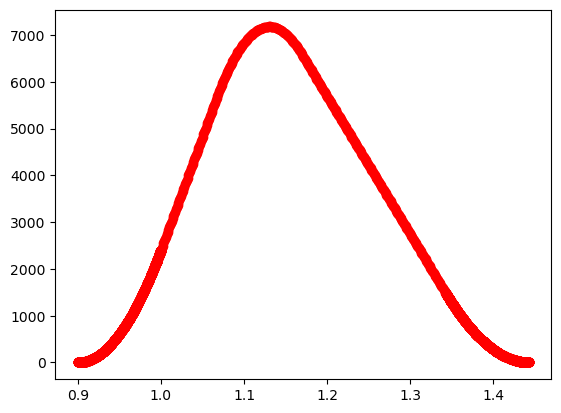

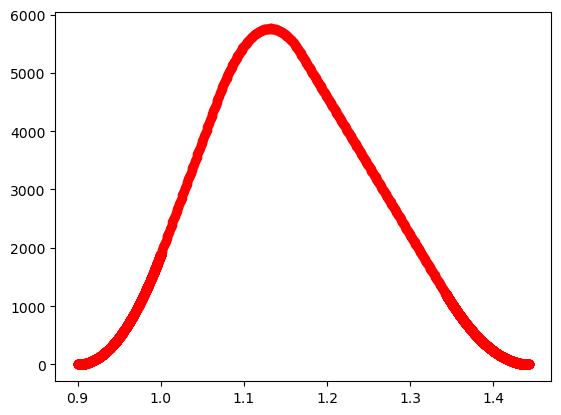

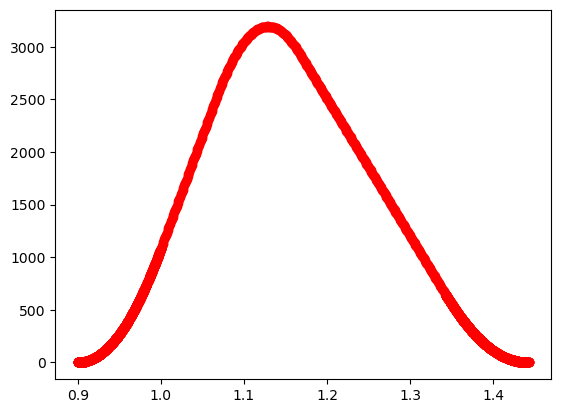

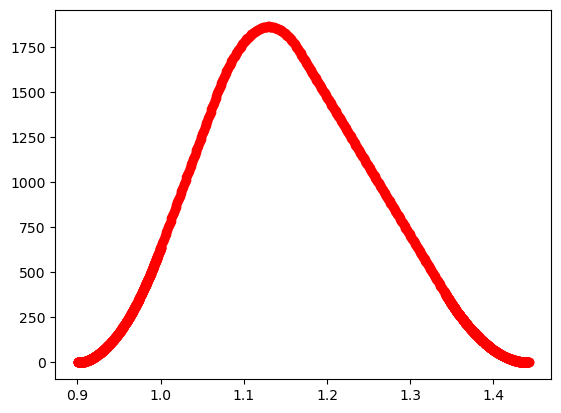

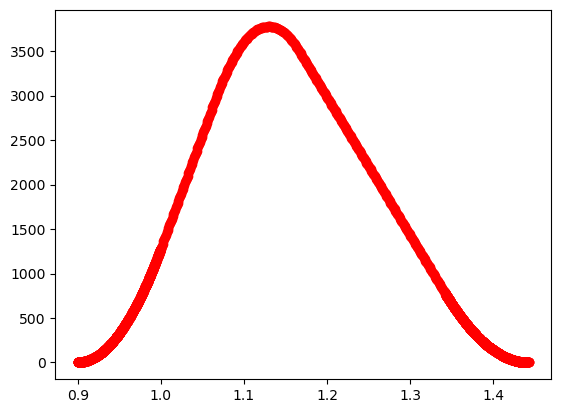

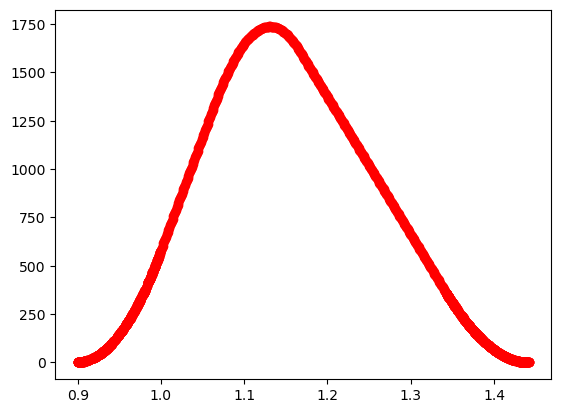

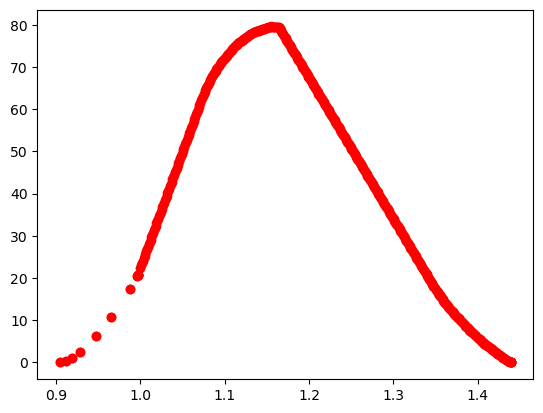

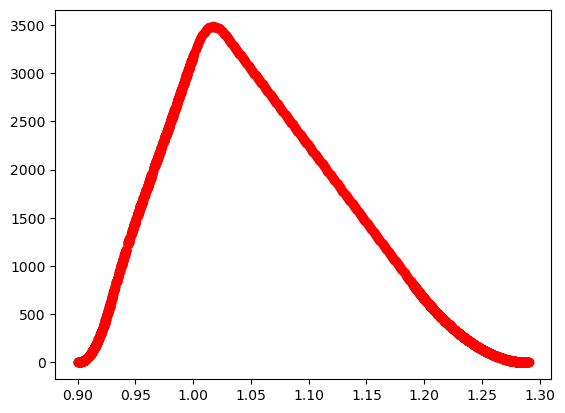

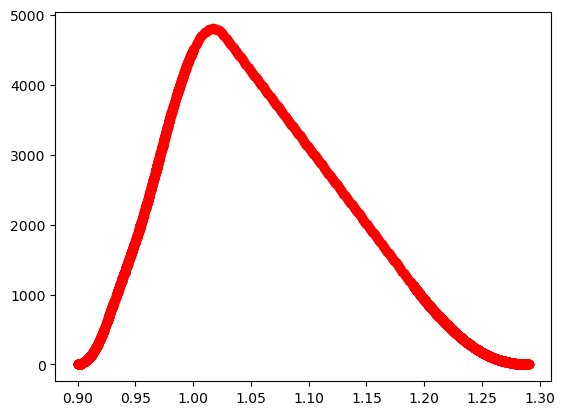

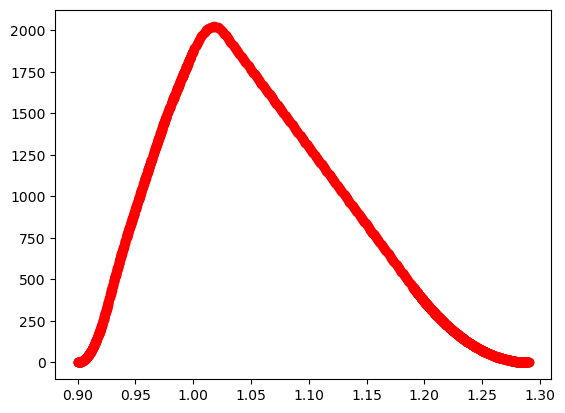

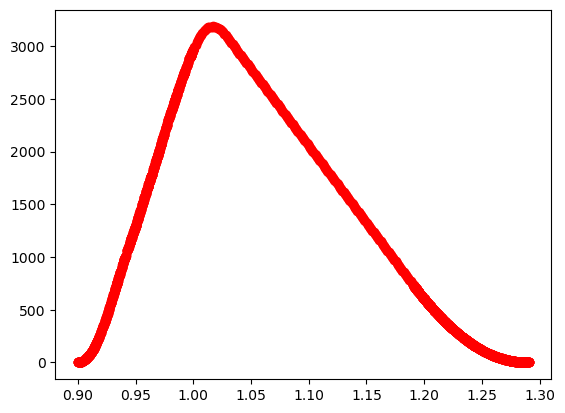

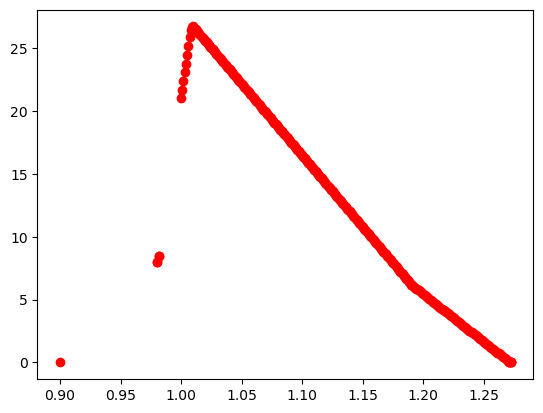

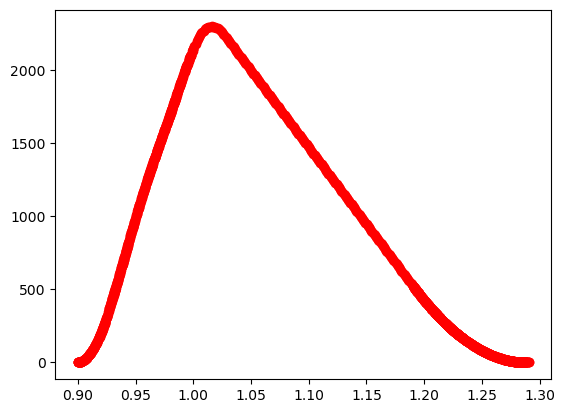

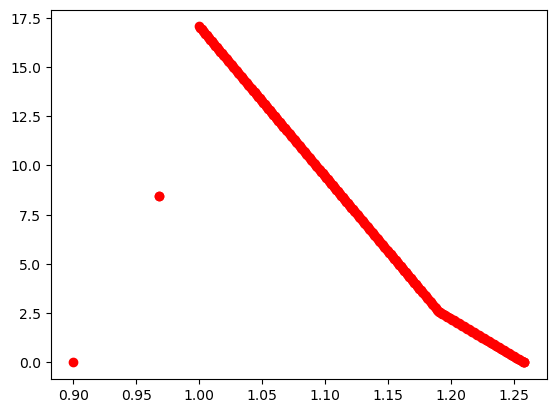

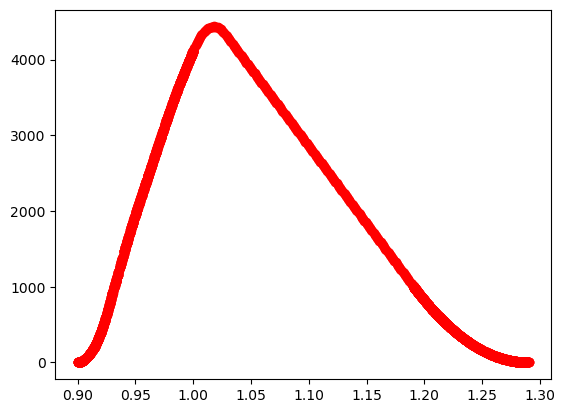

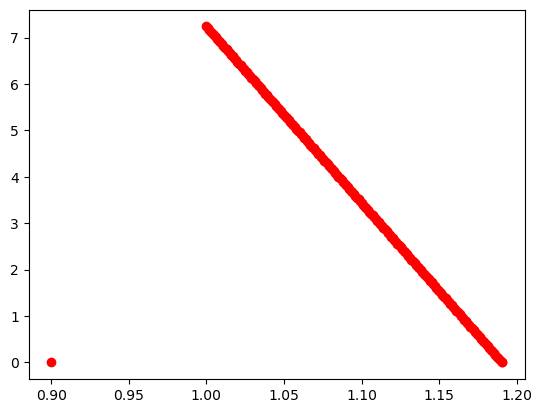

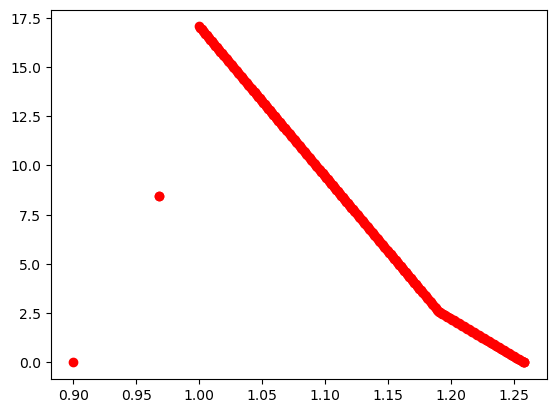

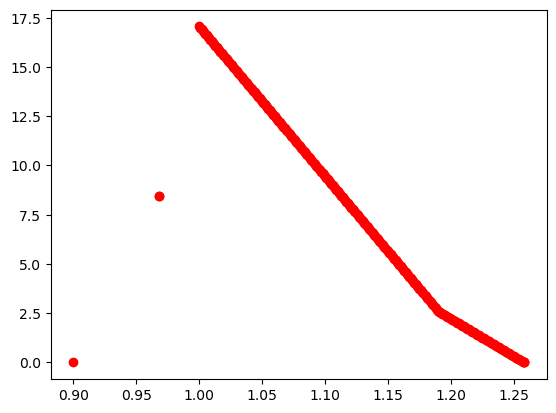

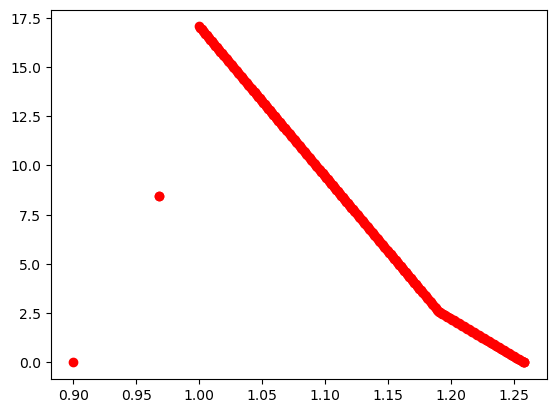

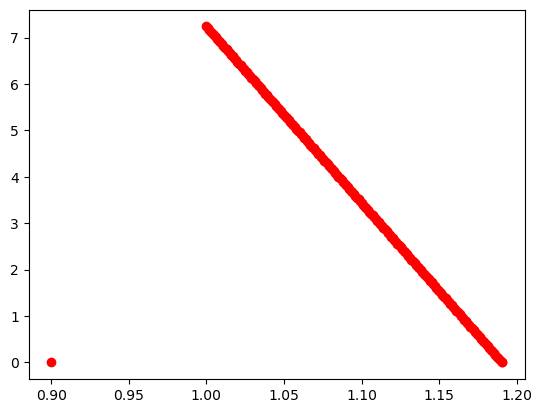

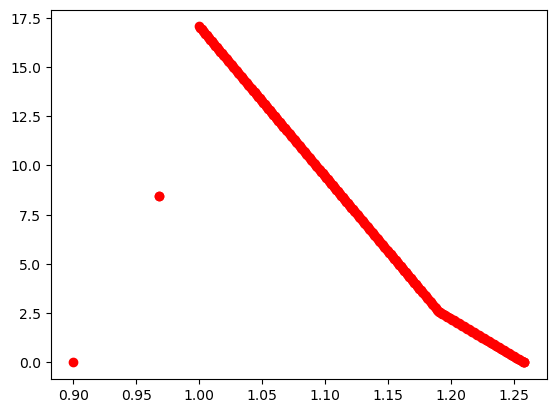

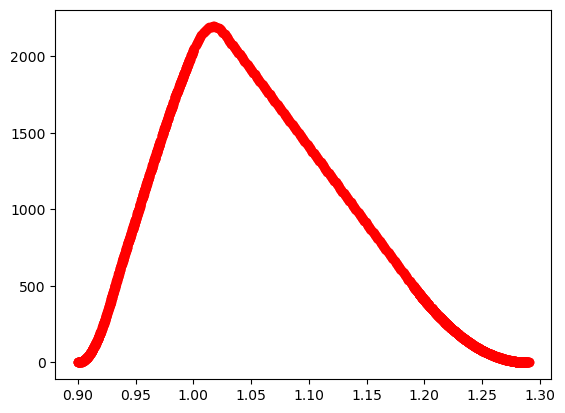

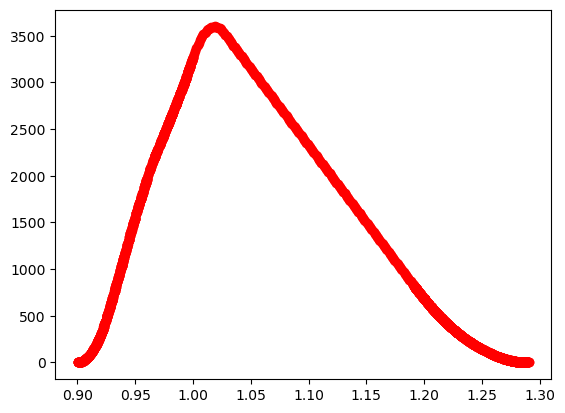

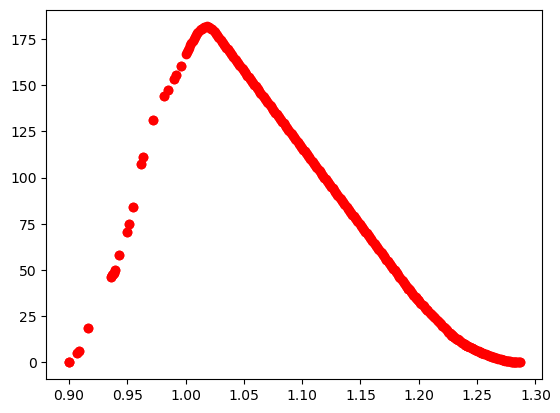

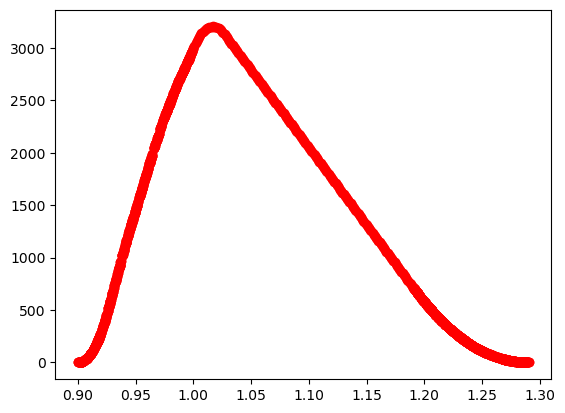

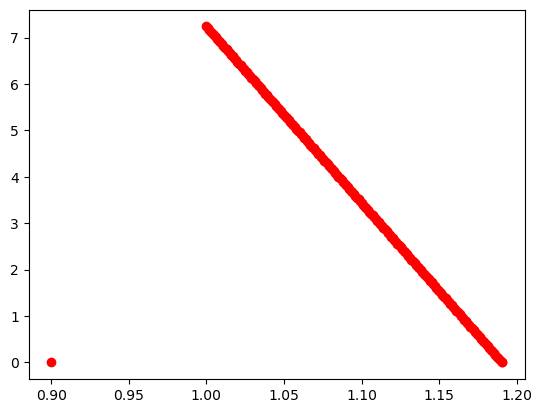

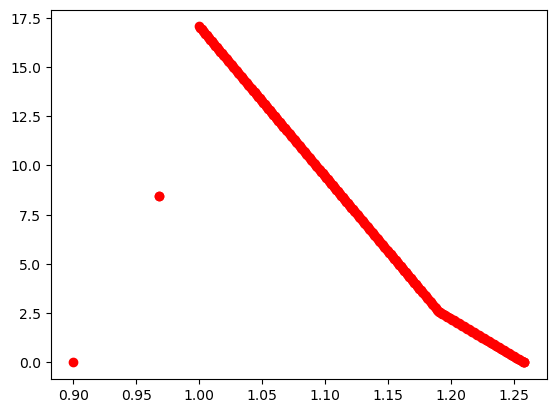

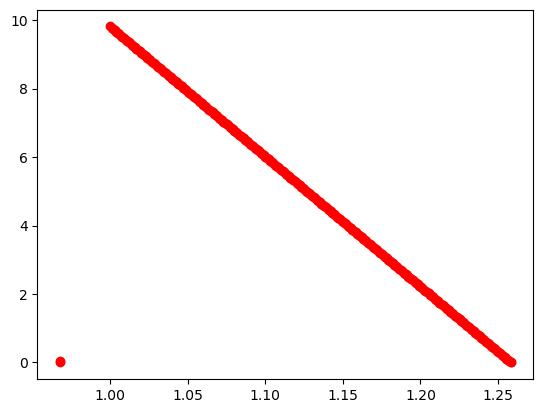

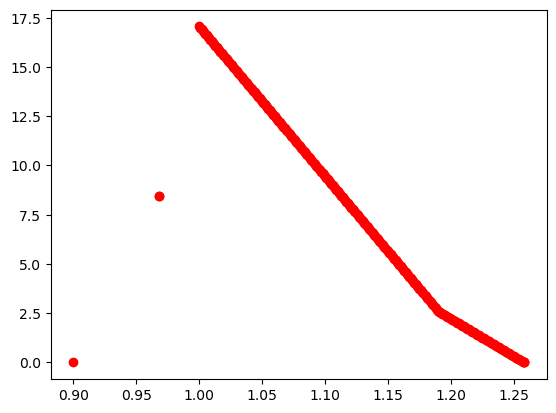

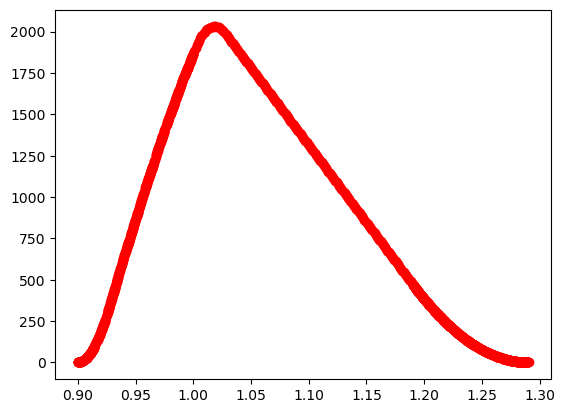

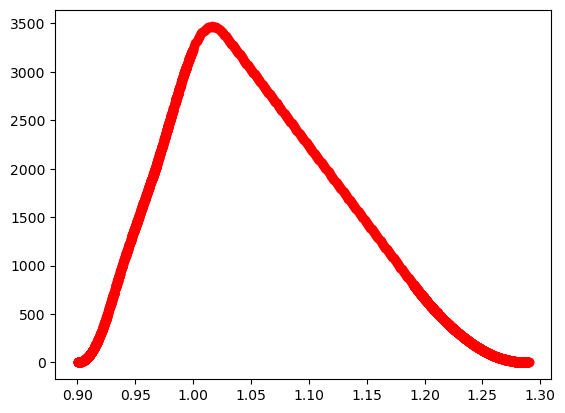

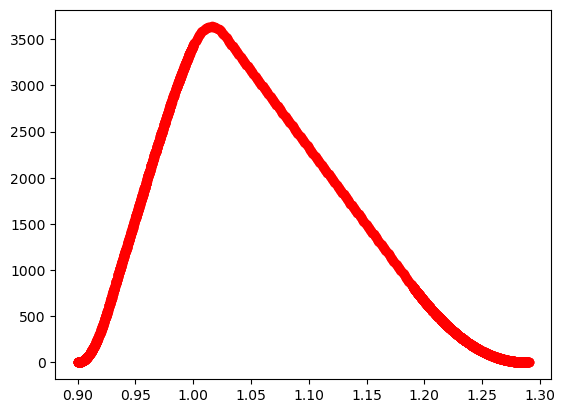

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [56]:
for x in dataset:
    plt.scatter(x[0],x[1],color='red')
    plt.show()
        

In [208]:
t=np.linspace(0.9,1.7,5)
print(t)

[0.9 1.1 1.3 1.5 1.7]


In [211]:
p=np.rand(0.9,1.7,5)
print(p)

AttributeError: module 'numpy' has no attribute 'rand'